[View in Colaboratory](https://colab.research.google.com/github/Scottdyt/ClassProject/blob/master/All%20CNN.ipynb)

# CIFAR - 10(PART.3)
10153903105 杜云滔
# Improved CNN using Argument and ALL CONVOLUTIONAL NET

Reference: **[STRIVING FOR SIMPLICITY: THE ALL CONVOLUTIONAL NET](https://arxiv.org/pdf/1412.6806.pdf)**

# Using google colab

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmps0l8i5pi/pubring.gpg' created
gpg: /tmp/tmps0l8i5pi/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········


## Change dir

In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
import os
path = "/content/drive/cifar10"
os.chdir(path)

## Inspect GPU and CPU usage

### GPU usage

In [4]:
import tensorflow
tensorflow.test.gpu_device_name()

'/device:GPU:0'

### List device info

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17423925250648790127, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10932840039
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 806062247498080444
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

### List memory info 

In [6]:
 !cat /proc/meminfo

MemTotal:       13341832 kB
MemFree:         3173800 kB
MemAvailable:    9210552 kB
Buffers:          298764 kB
Cached:          5763744 kB
SwapCached:            0 kB
Active:          6083664 kB
Inactive:        3284856 kB
Active(anon):    3486532 kB
Inactive(anon):    94900 kB
Active(file):    2597132 kB
Inactive(file):  3189956 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               840 kB
Writeback:             0 kB
AnonPages:       3306060 kB
Mapped:           715320 kB
Shmem:            275428 kB
Slab:             545344 kB
SReclaimable:     503080 kB
SUnreclaim:        42264 kB
KernelStack:        4016 kB
PageTables:        17648 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6670916 kB
Committed_AS:    5311728 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
HugePages_Total: 

###  List CPU info

In [7]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc eagerfpu pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm kaiser fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms xsaveopt
bugs		:
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache s

# Get Data

## Imports Pakages

In [8]:
%matplotlib inline
%config InlineBackend.figure_format="svg"
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
from keras.constraints import maxnorm
from keras.models import load_model
from keras.layers import GlobalAveragePooling2D, Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
from functions import get_class_names, get_train_data, get_test_data, plot_images,plot_model, predict_classes, error_plot,save_result

Using `gglot` style

In [0]:
matplotlib.style.use('ggplot')

## Get data and constants 

In [0]:
class_names = get_class_names()
num_classes = len(class_names)

In [0]:
IMAGE_SIZE = 32

CHANNELS = 3

NUM_EPOCH = 400

LEARN_RATE = 1.0e-4

In [0]:
train_images, train_labels, train_class = get_train_data()

In [0]:
test_images, test_labels, test_class = get_test_data()

In [15]:
print("Training dataset size: ",len(train_images))
print("Testing dataset size: ",len(test_images))

Training dataset size:  50000
Testing dataset size:  10000


successful load data and labels！

# Improved model

## Data Augmentation

using a ``kears`` function to augmentation images, like rotation, to enlarge images data set, let our networks study better

In [0]:
datagen = ImageDataGenerator(
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(train_images)

The above code augments the dataset to have random shifts, rotations and flips, thus increasing the size of the dataset.

## Build model

using pure Convolutional Neural Network: https://arxiv.org/pdf/1412.6806.pdf

In [0]:
def cnn_model():
    
    model = Sequential()
    
    model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same', input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)))    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same'))  
    model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same', strides = 2))    
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same'))    
    model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same'))
    model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same', strides = 2))    
    model.add(Dropout(0.5))    
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding='valid'))

    model.add(GlobalAveragePooling2D())
    
    model.add(Activation('softmax'))

    model.summary()
    
    return model

In [18]:
augmented_model = cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       166080    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 192)       331968    
__________

### Train model on the training data

Save the model every epoch

In [0]:
augmented_checkpoint = ModelCheckpoint('model/augmented_model.h5',  monitor='val_loss', verbose=0, save_best_only= True, mode='auto') 

using `categorical_crossentropy` loss function and `Adam` optimizer

In [0]:
augmented_model.compile(loss='categorical_crossentropy', # Better loss function for neural networks
              optimizer=Adam(lr=LEARN_RATE), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model

Fit the model on the data provided

In [21]:
augmented_model_details = augmented_model.fit_generator(datagen.flow(train_images, train_class, batch_size = 32),
                    steps_per_epoch = len(train_images) / 32, 
                    epochs = NUM_EPOCH, 
                    validation_data= (test_images, test_class),
                    callbacks=[augmented_checkpoint])

Epoch 1/400
1429/1562 [==========================>...] - ETA: 6s - loss: 1.9708 - acc: 0.2533

1563/1562 [==============================] - 84s 54ms/step - loss: 1.9585 - acc: 0.2582 - val_loss: 1.6591 - val_acc: 0.3835
Epoch 2/400
 547/1562 [=========>....................] - ETA: 51s - loss: 1.7638 - acc: 0.3459

1563/1562 [==============================] - 83s 53ms/step - loss: 1.7178 - acc: 0.3642 - val_loss: 1.4938 - val_acc: 0.4494
Epoch 3/400
 206/1562 [==>...........................] - ETA: 1:09 - loss: 1.6582 - acc: 0.3918

1563/1562 [==============================] - 83s 53ms/step - loss: 1.5957 - acc: 0.4122 - val_loss: 1.4194 - val_acc: 0.4861
Epoch 4/400
  56/1562 [>.............................] - ETA: 1:22 - loss: 1.5462 - acc: 0.4392

1563/1562 [==============================] - 83s 53ms/step - loss: 1.5140 - acc: 0.4464 - val_loss: 1.6557 - val_acc: 0.4491
Epoch 5/400
  21/1562 [..............................] - ETA: 1:15 - loss: 1.4757 - acc: 0.4777

1563/1562 [==============================] - 82s 53ms/step - loss: 1.4457 - acc: 0.4745 - val_loss: 1.2691 - val_acc: 0.5328
Epoch 6/400
  10/1562 [..............................] - ETA: 1:33 - loss: 1.4149 - acc: 0.5031

1544/1562 [============================>.] - ETA: 0s - loss: 1.3952 - acc: 0.4935

1563/1562 [==============================] - 83s 53ms/step - loss: 1.3945 - acc: 0.4938 - val_loss: 1.3245 - val_acc: 0.5358
Epoch 7/400
 590/1562 [==========>...................] - ETA: 48s - loss: 1.3731 - acc: 0.5044

1563/1562 [==============================] - 83s 53ms/step - loss: 1.3528 - acc: 0.5113 - val_loss: 1.2795 - val_acc: 0.5459
Epoch 8/400
 215/1562 [===>..........................] - ETA: 1:07 - loss: 1.3363 - acc: 0.5161

1563/1562 [==============================] - 82s 53ms/step - loss: 1.3177 - acc: 0.5255 - val_loss: 1.3310 - val_acc: 0.5358
Epoch 9/400
  72/1562 [>.............................] - ETA: 1:15 - loss: 1.2965 - acc: 0.5343

1563/1562 [==============================] - 82s 53ms/step - loss: 1.2807 - acc: 0.5383 - val_loss: 1.1266 - val_acc: 0.6006
Epoch 10/400
  12/1562 [..............................] - ETA: 1:49 - loss: 1.2170 - acc: 0.5260

1563/1562 [==============================] - 83s 53ms/step - loss: 1.2575 - acc: 0.5472 - val_loss: 1.1438 - val_acc: 0.5918
Epoch 11/400
   6/1562 [..............................] - ETA: 1:20 - loss: 1.1745 - acc: 0.5885

1563/1562 [==============================] - 82s 53ms/step - loss: 1.2280 - acc: 0.5587 - val_loss: 1.1713 - val_acc: 0.5960
Epoch 12/400
  19/1562 [..............................] - ETA: 1:15 - loss: 1.2000 - acc: 0.5724

1561/1562 [============================>.] - ETA: 0s - loss: 1.2037 - acc: 0.5687

1563/1562 [==============================] - 82s 53ms/step - loss: 1.2036 - acc: 0.5687 - val_loss: 1.1533 - val_acc: 0.5997
Epoch 13/400
 588/1562 [==========>...................] - ETA: 49s - loss: 1.1806 - acc: 0.5761

1563/1562 [==============================] - 82s 53ms/step - loss: 1.1733 - acc: 0.5823 - val_loss: 1.0617 - val_acc: 0.6221
Epoch 14/400
 219/1562 [===>..........................] - ETA: 1:09 - loss: 1.1566 - acc: 0.5918

1563/1562 [==============================] - 83s 53ms/step - loss: 1.1594 - acc: 0.5887 - val_loss: 1.0843 - val_acc: 0.6207
Epoch 15/400
  75/1562 [>.............................] - ETA: 1:15 - loss: 1.1368 - acc: 0.5992

1563/1562 [==============================] - 82s 53ms/step - loss: 1.1337 - acc: 0.5955 - val_loss: 1.1047 - val_acc: 0.6228
Epoch 16/400
  36/1562 [..............................] - ETA: 1:17 - loss: 1.1295 - acc: 0.5998

1563/1562 [==============================] - 82s 53ms/step - loss: 1.1202 - acc: 0.6002 - val_loss: 1.1210 - val_acc: 0.6166
Epoch 17/400
   6/1562 [..............................] - ETA: 1:19 - loss: 1.1840 - acc: 0.5938

1552/1562 [============================>.] - ETA: 0s - loss: 1.1008 - acc: 0.6083

1563/1562 [==============================] - 82s 53ms/step - loss: 1.1014 - acc: 0.6083 - val_loss: 1.0656 - val_acc: 0.6332
Epoch 18/400
 574/1562 [==========>...................] - ETA: 49s - loss: 1.0945 - acc: 0.6098

1563/1562 [==============================] - 82s 53ms/step - loss: 1.0838 - acc: 0.6131 - val_loss: 0.9985 - val_acc: 0.6550
Epoch 19/400
 213/1562 [===>..........................] - ETA: 1:08 - loss: 1.0719 - acc: 0.6205

1563/1562 [==============================] - 82s 53ms/step - loss: 1.0712 - acc: 0.6193 - val_loss: 1.0183 - val_acc: 0.6471
Epoch 20/400
  71/1562 [>.............................] - ETA: 1:16 - loss: 1.0685 - acc: 0.6232

1563/1562 [==============================] - 82s 53ms/step - loss: 1.0583 - acc: 0.6245 - val_loss: 1.0101 - val_acc: 0.6622
Epoch 21/400
  25/1562 [..............................] - ETA: 1:21 - loss: 1.0446 - acc: 0.6088

1563/1562 [==============================] - 82s 53ms/step - loss: 1.0387 - acc: 0.6280 - val_loss: 1.0277 - val_acc: 0.6533
Epoch 22/400
  13/1562 [..............................] - ETA: 1:19 - loss: 1.0499 - acc: 0.6226

1563/1562 [==============================] - 82s 53ms/step - loss: 1.0272 - acc: 0.6349 - val_loss: 1.0145 - val_acc: 0.6599
Epoch 23/400
   5/1562 [..............................] - ETA: 1:22 - loss: 0.8824 - acc: 0.6875

1563/1562 [==============================] - 82s 53ms/step - loss: 1.0155 - acc: 0.6392 - val_loss: 1.2220 - val_acc: 0.6187
Epoch 24/400
   4/1562 [..............................] - ETA: 1:20 - loss: 1.0898 - acc: 0.6094

1562/1562 [============================>.] - ETA: 0s - loss: 1.0081 - acc: 0.6455

1563/1562 [==============================] - 82s 53ms/step - loss: 1.0082 - acc: 0.6455 - val_loss: 1.0198 - val_acc: 0.6700
Epoch 25/400
 589/1562 [==========>...................] - ETA: 49s - loss: 0.9974 - acc: 0.6489

1563/1562 [==============================] - 83s 53ms/step - loss: 0.9903 - acc: 0.6497 - val_loss: 1.1576 - val_acc: 0.6360
Epoch 26/400
 208/1562 [==>...........................] - ETA: 1:07 - loss: 0.9846 - acc: 0.6540

1563/1562 [==============================] - 82s 53ms/step - loss: 0.9729 - acc: 0.6572 - val_loss: 0.9801 - val_acc: 0.6781
Epoch 27/400
  80/1562 [>.............................] - ETA: 1:18 - loss: 0.9322 - acc: 0.6770

1563/1562 [==============================] - 82s 53ms/step - loss: 0.9606 - acc: 0.6624 - val_loss: 1.0243 - val_acc: 0.6594
Epoch 28/400
  30/1562 [..............................] - ETA: 1:16 - loss: 0.9362 - acc: 0.6562

1563/1562 [==============================] - 82s 53ms/step - loss: 0.9508 - acc: 0.6663 - val_loss: 0.8942 - val_acc: 0.7009
Epoch 29/400
   9/1562 [..............................] - ETA: 1:39 - loss: 0.9094 - acc: 0.6562

1562/1562 [============================>.] - ETA: 0s - loss: 0.9453 - acc: 0.6702

1563/1562 [==============================] - 83s 53ms/step - loss: 0.9452 - acc: 0.6702 - val_loss: 0.9393 - val_acc: 0.6908
Epoch 30/400
 589/1562 [==========>...................] - ETA: 48s - loss: 0.9347 - acc: 0.6705

1563/1562 [==============================] - 82s 53ms/step - loss: 0.9274 - acc: 0.6744 - val_loss: 0.9051 - val_acc: 0.6939
Epoch 31/400
 221/1562 [===>..........................] - ETA: 1:07 - loss: 0.9342 - acc: 0.6693

1563/1562 [==============================] - 82s 53ms/step - loss: 0.9172 - acc: 0.6787 - val_loss: 0.9573 - val_acc: 0.6842
Epoch 32/400
  72/1562 [>.............................] - ETA: 1:15 - loss: 0.8961 - acc: 0.6788

1563/1562 [==============================] - 82s 53ms/step - loss: 0.9062 - acc: 0.6797 - val_loss: 0.9150 - val_acc: 0.6997
Epoch 33/400
  26/1562 [..............................] - ETA: 1:20 - loss: 0.9285 - acc: 0.6803

1563/1562 [==============================] - 82s 53ms/step - loss: 0.8938 - acc: 0.6871 - val_loss: 0.8424 - val_acc: 0.7199
Epoch 34/400
   1/1562 [..............................] - ETA: 1:37 - loss: 1.2302 - acc: 0.5625

1563/1562 [==============================] - 83s 53ms/step - loss: 0.8819 - acc: 0.6901 - val_loss: 1.0879 - val_acc: 0.6577
Epoch 35/400
   6/1562 [..............................] - ETA: 1:17 - loss: 0.9725 - acc: 0.6719

1561/1562 [============================>.] - ETA: 0s - loss: 0.8712 - acc: 0.6949

1563/1562 [==============================] - 82s 53ms/step - loss: 0.8712 - acc: 0.6949 - val_loss: 0.9355 - val_acc: 0.7024
Epoch 36/400
 585/1562 [==========>...................] - ETA: 49s - loss: 0.8664 - acc: 0.6932

1563/1562 [==============================] - 82s 53ms/step - loss: 0.8675 - acc: 0.6949 - val_loss: 0.9118 - val_acc: 0.7002
Epoch 37/400
 238/1562 [===>..........................] - ETA: 1:06 - loss: 0.8377 - acc: 0.7105

1563/1562 [==============================] - 82s 53ms/step - loss: 0.8538 - acc: 0.6999 - val_loss: 0.8742 - val_acc: 0.7105
Epoch 38/400
  80/1562 [>.............................] - ETA: 1:15 - loss: 0.8511 - acc: 0.6969

1563/1562 [==============================] - 83s 53ms/step - loss: 0.8511 - acc: 0.7024 - val_loss: 0.8793 - val_acc: 0.7132
Epoch 39/400
  23/1562 [..............................] - ETA: 1:16 - loss: 0.8298 - acc: 0.7188

1563/1562 [==============================] - 82s 52ms/step - loss: 0.8410 - acc: 0.7037 - val_loss: 0.8112 - val_acc: 0.7318
Epoch 40/400
  21/1562 [..............................] - ETA: 1:38 - loss: 0.8325 - acc: 0.7054

1562/1562 [============================>.] - ETA: 0s - loss: 0.8285 - acc: 0.7091

1563/1562 [==============================] - 83s 53ms/step - loss: 0.8286 - acc: 0.7091 - val_loss: 0.8334 - val_acc: 0.7264
Epoch 41/400
 572/1562 [=========>....................] - ETA: 49s - loss: 0.8285 - acc: 0.7075

1563/1562 [==============================] - 83s 53ms/step - loss: 0.8282 - acc: 0.7098 - val_loss: 0.8347 - val_acc: 0.7278
Epoch 42/400
 205/1562 [==>...........................] - ETA: 1:08 - loss: 0.8096 - acc: 0.7140

1563/1562 [==============================] - 82s 53ms/step - loss: 0.8114 - acc: 0.7144 - val_loss: 0.8032 - val_acc: 0.7362
Epoch 43/400
  69/1562 [>.............................] - ETA: 1:21 - loss: 0.8382 - acc: 0.6966

1563/1562 [==============================] - 83s 53ms/step - loss: 0.8006 - acc: 0.7184 - val_loss: 0.7271 - val_acc: 0.7597
Epoch 44/400
   8/1562 [..............................] - ETA: 1:48 - loss: 0.8071 - acc: 0.7148

1562/1562 [============================>.] - ETA: 0s - loss: 0.7941 - acc: 0.7223

1563/1562 [==============================] - 83s 53ms/step - loss: 0.7943 - acc: 0.7222 - val_loss: 0.8336 - val_acc: 0.7348
Epoch 45/400
 597/1562 [==========>...................] - ETA: 48s - loss: 0.7792 - acc: 0.7244

1563/1562 [==============================] - 82s 53ms/step - loss: 0.7860 - acc: 0.7231 - val_loss: 0.7715 - val_acc: 0.7524
Epoch 46/400
 235/1562 [===>..........................] - ETA: 1:06 - loss: 0.7829 - acc: 0.7227

1563/1562 [==============================] - 82s 53ms/step - loss: 0.7805 - acc: 0.7271 - val_loss: 0.7998 - val_acc: 0.7343
Epoch 47/400
  77/1562 [>.............................] - ETA: 1:14 - loss: 0.7848 - acc: 0.7256

1563/1562 [==============================] - 82s 53ms/step - loss: 0.7741 - acc: 0.7288 - val_loss: 0.9141 - val_acc: 0.7214
Epoch 48/400
  29/1562 [..............................] - ETA: 1:18 - loss: 0.7650 - acc: 0.7155

1563/1562 [==============================] - 82s 53ms/step - loss: 0.7633 - acc: 0.7311 - val_loss: 0.7501 - val_acc: 0.7534
Epoch 49/400
   8/1562 [..............................] - ETA: 1:24 - loss: 0.7159 - acc: 0.7344

1563/1562 [==============================] - 82s 53ms/step - loss: 0.7506 - acc: 0.7384 - val_loss: 0.6989 - val_acc: 0.7683
Epoch 50/400
   6/1562 [..............................] - ETA: 1:44 - loss: 0.7413 - acc: 0.7292

1563/1562 [==============================] - 82s 53ms/step - loss: 0.7514 - acc: 0.7405 - val_loss: 0.7348 - val_acc: 0.7611
Epoch 51/400
  14/1562 [..............................] - ETA: 1:19 - loss: 0.7976 - acc: 0.7567

1563/1562 [==============================] - 82s 53ms/step - loss: 0.7437 - acc: 0.7399 - val_loss: 0.8638 - val_acc: 0.7361
Epoch 52/400
   5/1562 [..............................] - ETA: 1:16 - loss: 0.7119 - acc: 0.7750

1563/1562 [==============================] - 82s 52ms/step - loss: 0.7352 - acc: 0.7425 - val_loss: 0.7248 - val_acc: 0.7677
Epoch 53/400
   8/1562 [..............................] - ETA: 1:23 - loss: 0.7434 - acc: 0.7617

1563/1562 [==============================] - 82s 52ms/step - loss: 0.7299 - acc: 0.7455 - val_loss: 0.6823 - val_acc: 0.7703
Epoch 54/400
  16/1562 [..............................] - ETA: 1:40 - loss: 0.6796 - acc: 0.7578

1561/1562 [============================>.] - ETA: 0s - loss: 0.7196 - acc: 0.7469

1563/1562 [==============================] - 83s 53ms/step - loss: 0.7195 - acc: 0.7469 - val_loss: 0.8570 - val_acc: 0.7380
Epoch 55/400
 573/1562 [==========>...................] - ETA: 49s - loss: 0.7096 - acc: 0.7509

1563/1562 [==============================] - 83s 53ms/step - loss: 0.7163 - acc: 0.7480 - val_loss: 0.6840 - val_acc: 0.7745
Epoch 56/400
 207/1562 [==>...........................] - ETA: 1:08 - loss: 0.7246 - acc: 0.7514

1563/1562 [==============================] - 82s 53ms/step - loss: 0.7099 - acc: 0.7538 - val_loss: 0.7400 - val_acc: 0.7593
Epoch 57/400
  96/1562 [>.............................] - ETA: 1:12 - loss: 0.7082 - acc: 0.7581

1563/1562 [==============================] - 82s 53ms/step - loss: 0.7041 - acc: 0.7550 - val_loss: 0.6874 - val_acc: 0.7776
Epoch 58/400
  26/1562 [..............................] - ETA: 1:18 - loss: 0.6609 - acc: 0.7764

1563/1562 [==============================] - 82s 52ms/step - loss: 0.6951 - acc: 0.7562 - val_loss: 0.7042 - val_acc: 0.7704
Epoch 59/400
  30/1562 [..............................] - ETA: 1:17 - loss: 0.6879 - acc: 0.7625

1563/1562 [==============================] - 82s 52ms/step - loss: 0.6905 - acc: 0.7617 - val_loss: 0.7434 - val_acc: 0.7636
Epoch 60/400
  29/1562 [..............................] - ETA: 1:16 - loss: 0.6986 - acc: 0.7425

1563/1562 [==============================] - 82s 52ms/step - loss: 0.6918 - acc: 0.7595 - val_loss: 0.6607 - val_acc: 0.7822
Epoch 61/400
  18/1562 [..............................] - ETA: 1:36 - loss: 0.6818 - acc: 0.7587

1563/1562 [==============================] - 82s 53ms/step - loss: 0.6788 - acc: 0.7628 - val_loss: 0.6665 - val_acc: 0.7840
Epoch 62/400
   5/1562 [..............................] - ETA: 1:23 - loss: 0.6546 - acc: 0.7625

1563/1562 [==============================] - 82s 52ms/step - loss: 0.6735 - acc: 0.7648 - val_loss: 0.6596 - val_acc: 0.7839
Epoch 63/400
  12/1562 [..............................] - ETA: 1:48 - loss: 0.6868 - acc: 0.7656

1563/1562 [==============================] - 82s 53ms/step - loss: 0.6705 - acc: 0.7666 - val_loss: 0.7531 - val_acc: 0.7580
Epoch 64/400
  14/1562 [..............................] - ETA: 1:17 - loss: 0.5563 - acc: 0.8192

1563/1562 [==============================] - 82s 53ms/step - loss: 0.6679 - acc: 0.7671 - val_loss: 0.7079 - val_acc: 0.7735
Epoch 65/400
   9/1562 [..............................] - ETA: 1:15 - loss: 0.6609 - acc: 0.7639

1563/1562 [==============================] - 82s 52ms/step - loss: 0.6585 - acc: 0.7734 - val_loss: 0.6777 - val_acc: 0.7847
Epoch 66/400
  13/1562 [..............................] - ETA: 1:17 - loss: 0.6804 - acc: 0.7620

1563/1562 [==============================] - 82s 52ms/step - loss: 0.6631 - acc: 0.7693 - val_loss: 0.6629 - val_acc: 0.7865
Epoch 67/400
  11/1562 [..............................] - ETA: 1:17 - loss: 0.7287 - acc: 0.7585

1563/1562 [==============================] - 82s 53ms/step - loss: 0.6531 - acc: 0.7719 - val_loss: 0.6596 - val_acc: 0.7871
Epoch 68/400
   1/1562 [..............................] - ETA: 1:28 - loss: 0.3776 - acc: 0.8438

1563/1562 [==============================] - 82s 52ms/step - loss: 0.6397 - acc: 0.7763 - val_loss: 0.6797 - val_acc: 0.7790
Epoch 69/400
   9/1562 [..............................] - ETA: 1:17 - loss: 0.6629 - acc: 0.7778

1563/1562 [==============================] - 82s 52ms/step - loss: 0.6406 - acc: 0.7761 - val_loss: 0.6408 - val_acc: 0.7931
Epoch 70/400
  26/1562 [..............................] - ETA: 1:27 - loss: 0.6197 - acc: 0.7812

1563/1562 [==============================] - 82s 53ms/step - loss: 0.6352 - acc: 0.7792 - val_loss: 0.6034 - val_acc: 0.7993
Epoch 71/400
  16/1562 [..............................] - ETA: 1:30 - loss: 0.6547 - acc: 0.7715

1563/1562 [==============================] - 82s 53ms/step - loss: 0.6332 - acc: 0.7813 - val_loss: 0.5978 - val_acc: 0.8013
Epoch 72/400
   5/1562 [..............................] - ETA: 1:39 - loss: 0.5421 - acc: 0.7937

1563/1562 [==============================] - 83s 53ms/step - loss: 0.6256 - acc: 0.7816 - val_loss: 0.6627 - val_acc: 0.7855


Epoch 73/400
1381/1562 [=========================>....] - ETA: 9s - loss: 0.6270 - acc: 0.7818

1563/1562 [==============================] - 82s 53ms/step - loss: 0.6272 - acc: 0.7816 - val_loss: 0.6240 - val_acc: 0.7913
Epoch 74/400
 498/1562 [========>.....................] - ETA: 53s - loss: 0.6148 - acc: 0.7869

1563/1562 [==============================] - 82s 53ms/step - loss: 0.6139 - acc: 0.7859 - val_loss: 0.6662 - val_acc: 0.7919
Epoch 75/400
 192/1562 [==>...........................] - ETA: 1:09 - loss: 0.6148 - acc: 0.7865

1563/1562 [==============================] - 82s 53ms/step - loss: 0.6180 - acc: 0.7868 - val_loss: 0.5793 - val_acc: 0.8131
Epoch 76/400
  63/1562 [>.............................] - ETA: 1:24 - loss: 0.5676 - acc: 0.7927

1563/1562 [==============================] - 82s 53ms/step - loss: 0.6117 - acc: 0.7869 - val_loss: 0.5987 - val_acc: 0.8055
Epoch 77/400
  33/1562 [..............................] - ETA: 1:16 - loss: 0.6060 - acc: 0.7917

1563/1562 [==============================] - 82s 52ms/step - loss: 0.6078 - acc: 0.7917 - val_loss: 0.5467 - val_acc: 0.8203
Epoch 78/400
  22/1562 [..............................] - ETA: 1:32 - loss: 0.5729 - acc: 0.7898

1562/1562 [============================>.] - ETA: 0s - loss: 0.6047 - acc: 0.7893

1563/1562 [==============================] - 83s 53ms/step - loss: 0.6046 - acc: 0.7892 - val_loss: 0.6218 - val_acc: 0.7996
Epoch 79/400
 590/1562 [==========>...................] - ETA: 48s - loss: 0.6018 - acc: 0.7881

1563/1562 [==============================] - 82s 53ms/step - loss: 0.5966 - acc: 0.7912 - val_loss: 0.5994 - val_acc: 0.8045
Epoch 80/400
 220/1562 [===>..........................] - ETA: 1:06 - loss: 0.5829 - acc: 0.7947

1563/1562 [==============================] - 82s 52ms/step - loss: 0.5925 - acc: 0.7925 - val_loss: 0.6237 - val_acc: 0.8022
Epoch 81/400
  83/1562 [>.............................] - ETA: 1:14 - loss: 0.5841 - acc: 0.7948

1563/1562 [==============================] - 82s 52ms/step - loss: 0.5902 - acc: 0.7934 - val_loss: 0.6268 - val_acc: 0.8021
Epoch 82/400
  46/1562 [..............................] - ETA: 1:16 - loss: 0.5826 - acc: 0.8010

1563/1562 [==============================] - 82s 52ms/step - loss: 0.5832 - acc: 0.7985 - val_loss: 0.6093 - val_acc: 0.8075
Epoch 83/400
  41/1562 [..............................] - ETA: 1:16 - loss: 0.5335 - acc: 0.8102

1563/1562 [==============================] - 82s 52ms/step - loss: 0.5824 - acc: 0.7969 - val_loss: 0.7159 - val_acc: 0.7759
Epoch 84/400
  53/1562 [>.............................] - ETA: 1:14 - loss: 0.5700 - acc: 0.8054

1563/1562 [==============================] - 82s 52ms/step - loss: 0.5729 - acc: 0.8007 - val_loss: 0.6069 - val_acc: 0.8068
Epoch 85/400
  24/1562 [..............................] - ETA: 1:18 - loss: 0.6126 - acc: 0.7773

1563/1562 [==============================] - 83s 53ms/step - loss: 0.5735 - acc: 0.8011 - val_loss: 0.5602 - val_acc: 0.8172
Epoch 86/400
   3/1562 [..............................] - ETA: 1:18 - loss: 0.4946 - acc: 0.8125

1563/1562 [==============================] - 82s 53ms/step - loss: 0.5692 - acc: 0.8033 - val_loss: 0.5898 - val_acc: 0.8049
Epoch 87/400
   5/1562 [..............................] - ETA: 1:20 - loss: 0.5422 - acc: 0.8000

1563/1562 [==============================] - 82s 53ms/step - loss: 0.5684 - acc: 0.8029 - val_loss: 0.6109 - val_acc: 0.8053
Epoch 88/400
   7/1562 [..............................] - ETA: 1:19 - loss: 0.6584 - acc: 0.7812

1563/1562 [==============================] - 82s 53ms/step - loss: 0.5581 - acc: 0.8058 - val_loss: 0.6508 - val_acc: 0.7994
Epoch 89/400
   1/1562 [..............................] - ETA: 1:17 - loss: 0.6024 - acc: 0.7812

1563/1562 [==============================] - 82s 53ms/step - loss: 0.5633 - acc: 0.8033 - val_loss: 0.5505 - val_acc: 0.8138
Epoch 90/400
   8/1562 [..............................] - ETA: 1:21 - loss: 0.5520 - acc: 0.8125

1563/1562 [==============================] - 82s 53ms/step - loss: 0.5568 - acc: 0.8072 - val_loss: 0.5787 - val_acc: 0.8120
Epoch 91/400
  14/1562 [..............................] - ETA: 1:21 - loss: 0.5408 - acc: 0.8170

1563/1562 [==============================] - 82s 52ms/step - loss: 0.5552 - acc: 0.8081 - val_loss: 0.6719 - val_acc: 0.8002
Epoch 92/400
  22/1562 [..............................] - ETA: 1:16 - loss: 0.5804 - acc: 0.8153

1563/1562 [==============================] - 82s 52ms/step - loss: 0.5481 - acc: 0.8096 - val_loss: 0.5866 - val_acc: 0.8049
Epoch 93/400
  36/1562 [..............................] - ETA: 1:16 - loss: 0.5102 - acc: 0.8273

1563/1562 [==============================] - 82s 53ms/step - loss: 0.5450 - acc: 0.8092 - val_loss: 0.5418 - val_acc: 0.8230
Epoch 94/400
  17/1562 [..............................] - ETA: 1:34 - loss: 0.5312 - acc: 0.8033

1563/1562 [==============================] - 82s 53ms/step - loss: 0.5442 - acc: 0.8092 - val_loss: 0.6400 - val_acc: 0.7987
Epoch 95/400
   3/1562 [..............................] - ETA: 1:19 - loss: 0.4749 - acc: 0.8229

1563/1562 [==============================] - 82s 52ms/step - loss: 0.5371 - acc: 0.8112 - val_loss: 0.5253 - val_acc: 0.8296
Epoch 96/400
  10/1562 [..............................] - ETA: 1:39 - loss: 0.5297 - acc: 0.8156

1563/1562 [==============================] - 82s 52ms/step - loss: 0.5314 - acc: 0.8164 - val_loss: 0.5391 - val_acc: 0.8230
Epoch 97/400
  30/1562 [..............................] - ETA: 1:16 - loss: 0.5571 - acc: 0.8104

1563/1562 [==============================] - 82s 53ms/step - loss: 0.5372 - acc: 0.8128 - val_loss: 0.5795 - val_acc: 0.8101
Epoch 98/400
  27/1562 [..............................] - ETA: 1:20 - loss: 0.4877 - acc: 0.8079

1563/1562 [==============================] - 82s 53ms/step - loss: 0.5316 - acc: 0.8158 - val_loss: 0.5605 - val_acc: 0.8224
Epoch 99/400
  18/1562 [..............................] - ETA: 1:16 - loss: 0.5116 - acc: 0.8247

1563/1562 [==============================] - 82s 53ms/step - loss: 0.5291 - acc: 0.8154 - val_loss: 0.5174 - val_acc: 0.8337
Epoch 100/400
   4/1562 [..............................] - ETA: 1:38 - loss: 0.5173 - acc: 0.8125

1563/1562 [==============================] - 83s 53ms/step - loss: 0.5224 - acc: 0.8182 - val_loss: 0.5821 - val_acc: 0.8151
Epoch 101/400
   2/1562 [..............................] - ETA: 1:24 - loss: 0.5220 - acc: 0.7812

1563/1562 [==============================] - 82s 52ms/step - loss: 0.5164 - acc: 0.8211 - val_loss: 0.5736 - val_acc: 0.8250
Epoch 102/400
  14/1562 [..............................] - ETA: 1:17 - loss: 0.5655 - acc: 0.8013

1563/1562 [==============================] - 82s 53ms/step - loss: 0.5159 - acc: 0.8205 - val_loss: 0.5436 - val_acc: 0.8261
Epoch 103/400
   7/1562 [..............................] - ETA: 1:19 - loss: 0.4826 - acc: 0.8080

1563/1562 [==============================] - 82s 53ms/step - loss: 0.5171 - acc: 0.8206 - val_loss: 0.5551 - val_acc: 0.8232
Epoch 104/400
  10/1562 [..............................] - ETA: 1:18 - loss: 0.4984 - acc: 0.8219

1563/1562 [==============================] - 82s 52ms/step - loss: 0.5100 - acc: 0.8211 - val_loss: 0.6008 - val_acc: 0.8151
Epoch 105/400
  28/1562 [..............................] - ETA: 1:14 - loss: 0.5118 - acc: 0.8147

1563/1562 [==============================] - 82s 53ms/step - loss: 0.5086 - acc: 0.8245 - val_loss: 0.5638 - val_acc: 0.8260
Epoch 106/400
  20/1562 [..............................] - ETA: 1:18 - loss: 0.4506 - acc: 0.8594

1563/1562 [==============================] - 82s 53ms/step - loss: 0.5054 - acc: 0.8238 - val_loss: 0.5411 - val_acc: 0.8253
Epoch 107/400
   5/1562 [..............................] - ETA: 1:19 - loss: 0.4907 - acc: 0.8313

1563/1562 [==============================] - 82s 53ms/step - loss: 0.5018 - acc: 0.8244 - val_loss: 0.5143 - val_acc: 0.8322


Epoch 108/400
1390/1562 [=========================>....] - ETA: 8s - loss: 0.5007 - acc: 0.8253

1563/1562 [==============================] - 82s 52ms/step - loss: 0.4989 - acc: 0.8266 - val_loss: 0.5137 - val_acc: 0.8270
Epoch 109/400
 494/1562 [========>.....................] - ETA: 54s - loss: 0.4994 - acc: 0.8253

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4998 - acc: 0.8240 - val_loss: 0.5445 - val_acc: 0.8278
Epoch 110/400
 160/1562 [==>...........................] - ETA: 1:11 - loss: 0.4862 - acc: 0.8287

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4924 - acc: 0.8288 - val_loss: 0.5092 - val_acc: 0.8337
Epoch 111/400
  59/1562 [>.............................] - ETA: 1:21 - loss: 0.4952 - acc: 0.8263

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4945 - acc: 0.8271 - val_loss: 0.5242 - val_acc: 0.8318
Epoch 112/400
  30/1562 [..............................] - ETA: 1:17 - loss: 0.4556 - acc: 0.8385

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4922 - acc: 0.8296 - val_loss: 0.5659 - val_acc: 0.8232
Epoch 113/400
  16/1562 [..............................] - ETA: 1:19 - loss: 0.4956 - acc: 0.8223

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4868 - acc: 0.8317 - val_loss: 0.5508 - val_acc: 0.8277
Epoch 114/400
  10/1562 [..............................] - ETA: 1:19 - loss: 0.3783 - acc: 0.8688

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4896 - acc: 0.8286 - val_loss: 0.5122 - val_acc: 0.8356
Epoch 115/400
  13/1562 [..............................] - ETA: 1:22 - loss: 0.4885 - acc: 0.8317

1563/1562 [==============================] - 82s 52ms/step - loss: 0.4820 - acc: 0.8319 - val_loss: 0.5612 - val_acc: 0.8267
Epoch 116/400
  17/1562 [..............................] - ETA: 1:20 - loss: 0.4692 - acc: 0.8419

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4790 - acc: 0.8344 - val_loss: 0.5820 - val_acc: 0.8203
Epoch 117/400
  12/1562 [..............................] - ETA: 1:17 - loss: 0.4370 - acc: 0.8568

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4807 - acc: 0.8337 - val_loss: 0.5526 - val_acc: 0.8235
Epoch 118/400
  15/1562 [..............................] - ETA: 1:18 - loss: 0.4510 - acc: 0.8417

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4745 - acc: 0.8344 - val_loss: 0.5017 - val_acc: 0.8399
Epoch 119/400
   2/1562 [..............................] - ETA: 1:31 - loss: 0.5552 - acc: 0.8281

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4682 - acc: 0.8386 - val_loss: 0.5023 - val_acc: 0.8362
Epoch 120/400
  11/1562 [..............................] - ETA: 1:19 - loss: 0.4178 - acc: 0.8608

1552/1562 [============================>.] - ETA: 0s - loss: 0.4677 - acc: 0.8379

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4684 - acc: 0.8377 - val_loss: 0.5100 - val_acc: 0.8381
Epoch 121/400
 549/1562 [=========>....................] - ETA: 51s - loss: 0.4674 - acc: 0.8364

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4646 - acc: 0.8381 - val_loss: 0.5292 - val_acc: 0.8335
Epoch 122/400
 202/1562 [==>...........................] - ETA: 1:08 - loss: 0.4533 - acc: 0.8439

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4675 - acc: 0.8381 - val_loss: 0.5145 - val_acc: 0.8359
Epoch 123/400
  74/1562 [>.............................] - ETA: 1:14 - loss: 0.4669 - acc: 0.8467

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4608 - acc: 0.8398 - val_loss: 0.5683 - val_acc: 0.8267
Epoch 124/400


1563/1562 [==============================] - 83s 53ms/step - loss: 0.4595 - acc: 0.8411 - val_loss: 0.5218 - val_acc: 0.8364
Epoch 125/400
   2/1562 [..............................] - ETA: 1:22 - loss: 0.3217 - acc: 0.8594

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4605 - acc: 0.8393 - val_loss: 0.5309 - val_acc: 0.8316
Epoch 126/400
   2/1562 [..............................] - ETA: 1:20 - loss: 0.2796 - acc: 0.9062

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4520 - acc: 0.8411 - val_loss: 0.5122 - val_acc: 0.8358
Epoch 127/400
   3/1562 [..............................] - ETA: 1:15 - loss: 0.3136 - acc: 0.9062

1562/1562 [============================>.] - ETA: 0s - loss: 0.4555 - acc: 0.8413

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4555 - acc: 0.8413 - val_loss: 0.5327 - val_acc: 0.8340
Epoch 128/400
 567/1562 [=========>....................] - ETA: 50s - loss: 0.4371 - acc: 0.8505

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4477 - acc: 0.8448 - val_loss: 0.4898 - val_acc: 0.8451
Epoch 129/400
 213/1562 [===>..........................] - ETA: 1:09 - loss: 0.4505 - acc: 0.8380

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4506 - acc: 0.8420 - val_loss: 0.5624 - val_acc: 0.8242
Epoch 130/400
  89/1562 [>.............................] - ETA: 1:14 - loss: 0.4444 - acc: 0.8441

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4467 - acc: 0.8431 - val_loss: 0.5719 - val_acc: 0.8236
Epoch 131/400
  32/1562 [..............................] - ETA: 1:17 - loss: 0.4329 - acc: 0.8555

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4435 - acc: 0.8455 - val_loss: 0.5404 - val_acc: 0.8369
Epoch 132/400
   7/1562 [..............................] - ETA: 1:21 - loss: 0.3564 - acc: 0.8795

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4460 - acc: 0.8435 - val_loss: 0.4688 - val_acc: 0.8474


Epoch 133/400
1359/1562 [=========================>....] - ETA: 10s - loss: 0.4411 - acc: 0.8470

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4428 - acc: 0.8464 - val_loss: 0.5793 - val_acc: 0.8264
Epoch 134/400
 511/1562 [========>.....................] - ETA: 52s - loss: 0.4368 - acc: 0.8470

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4403 - acc: 0.8462 - val_loss: 0.5452 - val_acc: 0.8322
Epoch 135/400
 206/1562 [==>...........................] - ETA: 1:08 - loss: 0.4184 - acc: 0.8532

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4338 - acc: 0.8488 - val_loss: 0.5428 - val_acc: 0.8337
Epoch 136/400
  69/1562 [>.............................] - ETA: 1:14 - loss: 0.4177 - acc: 0.8578

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4329 - acc: 0.8493 - val_loss: 0.5068 - val_acc: 0.8459
Epoch 137/400
   3/1562 [..............................] - ETA: 1:20 - loss: 0.3786 - acc: 0.8542

1562/1562 [============================>.] - ETA: 0s - loss: 0.4352 - acc: 0.8467

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4352 - acc: 0.8467 - val_loss: 0.5596 - val_acc: 0.8354
Epoch 138/400
 580/1562 [==========>...................] - ETA: 49s - loss: 0.4302 - acc: 0.8481

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4293 - acc: 0.8498 - val_loss: 0.5007 - val_acc: 0.8446
Epoch 139/400
 218/1562 [===>..........................] - ETA: 1:07 - loss: 0.4357 - acc: 0.8488

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4294 - acc: 0.8503 - val_loss: 0.4724 - val_acc: 0.8514
Epoch 140/400
  63/1562 [>.............................] - ETA: 1:15 - loss: 0.4531 - acc: 0.8428

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4259 - acc: 0.8521 - val_loss: 0.5898 - val_acc: 0.8295
Epoch 141/400
  10/1562 [..............................] - ETA: 1:20 - loss: 0.3891 - acc: 0.8625

1561/1562 [============================>.] - ETA: 0s - loss: 0.4254 - acc: 0.8517

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4255 - acc: 0.8517 - val_loss: 0.5396 - val_acc: 0.8341
Epoch 142/400
 536/1562 [=========>....................] - ETA: 52s - loss: 0.4310 - acc: 0.8507

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4233 - acc: 0.8526 - val_loss: 0.5693 - val_acc: 0.8287
Epoch 143/400
 206/1562 [==>...........................] - ETA: 1:08 - loss: 0.4254 - acc: 0.8466

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4216 - acc: 0.8520 - val_loss: 0.4710 - val_acc: 0.8516
Epoch 144/400
  70/1562 [>.............................] - ETA: 1:16 - loss: 0.4130 - acc: 0.8504

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4176 - acc: 0.8534 - val_loss: 0.5242 - val_acc: 0.8364
Epoch 145/400
  15/1562 [..............................] - ETA: 1:19 - loss: 0.4304 - acc: 0.8646

1562/1562 [============================>.] - ETA: 0s - loss: 0.4135 - acc: 0.8562

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4135 - acc: 0.8562 - val_loss: 0.4636 - val_acc: 0.8524
Epoch 146/400
 552/1562 [=========>....................] - ETA: 51s - loss: 0.4083 - acc: 0.8548

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4163 - acc: 0.8536 - val_loss: 0.4924 - val_acc: 0.8490
Epoch 147/400
 180/1562 [==>...........................] - ETA: 1:10 - loss: 0.4149 - acc: 0.8528

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4170 - acc: 0.8532 - val_loss: 0.4963 - val_acc: 0.8442
Epoch 148/400
  52/1562 [..............................] - ETA: 1:17 - loss: 0.4289 - acc: 0.8510

1562/1562 [============================>.] - ETA: 0s - loss: 0.4148 - acc: 0.8552

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4148 - acc: 0.8552 - val_loss: 0.5493 - val_acc: 0.8330
Epoch 149/400
 601/1562 [==========>...................] - ETA: 48s - loss: 0.4038 - acc: 0.8576

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4074 - acc: 0.8576 - val_loss: 0.5249 - val_acc: 0.8367
Epoch 150/400
 211/1562 [===>..........................] - ETA: 1:08 - loss: 0.4062 - acc: 0.8584

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4096 - acc: 0.8566 - val_loss: 0.5733 - val_acc: 0.8332
Epoch 151/400
  71/1562 [>.............................] - ETA: 1:16 - loss: 0.3789 - acc: 0.8715

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4027 - acc: 0.8598 - val_loss: 0.5015 - val_acc: 0.8454


Epoch 152/400
1391/1562 [=========================>....] - ETA: 8s - loss: 0.4048 - acc: 0.8597

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4061 - acc: 0.8595 - val_loss: 0.5033 - val_acc: 0.8471
Epoch 153/400
 509/1562 [========>.....................] - ETA: 53s - loss: 0.4017 - acc: 0.8594

1563/1562 [==============================] - 82s 53ms/step - loss: 0.4079 - acc: 0.8577 - val_loss: 0.5307 - val_acc: 0.8361
Epoch 154/400
 193/1562 [==>...........................] - ETA: 1:09 - loss: 0.3907 - acc: 0.8598

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4004 - acc: 0.8596 - val_loss: 0.4287 - val_acc: 0.8643
Epoch 155/400
  54/1562 [>.............................] - ETA: 1:22 - loss: 0.3626 - acc: 0.8681

1563/1562 [==============================] - 83s 53ms/step - loss: 0.3981 - acc: 0.8618 - val_loss: 0.4570 - val_acc: 0.8556
Epoch 156/400
  18/1562 [..............................] - ETA: 1:18 - loss: 0.3595 - acc: 0.8698

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3941 - acc: 0.8640 - val_loss: 0.5496 - val_acc: 0.8332
Epoch 157/400
   5/1562 [..............................] - ETA: 1:22 - loss: 0.4025 - acc: 0.8750

1527/1562 [============================>.] - ETA: 1s - loss: 0.3988 - acc: 0.8618

1563/1562 [==============================] - 83s 53ms/step - loss: 0.4002 - acc: 0.8611 - val_loss: 0.4635 - val_acc: 0.8524
Epoch 158/400
 573/1562 [==========>...................] - ETA: 49s - loss: 0.3920 - acc: 0.8655

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3903 - acc: 0.8653 - val_loss: 0.4863 - val_acc: 0.8482
Epoch 159/400
 201/1562 [==>...........................] - ETA: 1:09 - loss: 0.3755 - acc: 0.8674

1563/1562 [==============================] - 83s 53ms/step - loss: 0.3934 - acc: 0.8626 - val_loss: 0.4789 - val_acc: 0.8515
Epoch 160/400
  74/1562 [>.............................] - ETA: 1:16 - loss: 0.3944 - acc: 0.8653

1563/1562 [==============================] - 83s 53ms/step - loss: 0.3918 - acc: 0.8623 - val_loss: 0.4617 - val_acc: 0.8603
Epoch 161/400
  15/1562 [..............................] - ETA: 1:18 - loss: 0.3853 - acc: 0.8750

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3865 - acc: 0.8639 - val_loss: 0.4582 - val_acc: 0.8578
Epoch 162/400
  20/1562 [..............................] - ETA: 1:17 - loss: 0.3802 - acc: 0.8734

1563/1562 [==============================] - 82s 52ms/step - loss: 0.3893 - acc: 0.8650 - val_loss: 0.4571 - val_acc: 0.8584
Epoch 163/400
  30/1562 [..............................] - ETA: 1:16 - loss: 0.3617 - acc: 0.8625

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3900 - acc: 0.8637 - val_loss: 0.5129 - val_acc: 0.8442
Epoch 164/400
   9/1562 [..............................] - ETA: 1:19 - loss: 0.3907 - acc: 0.8750

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3841 - acc: 0.8658 - val_loss: 0.4160 - val_acc: 0.8670
Epoch 165/400
   9/1562 [..............................] - ETA: 1:45 - loss: 0.4036 - acc: 0.8646

1563/1562 [==============================] - 83s 53ms/step - loss: 0.3852 - acc: 0.8646 - val_loss: 0.4867 - val_acc: 0.8522


Epoch 166/400
1349/1562 [========================>.....] - ETA: 10s - loss: 0.3800 - acc: 0.8658

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3804 - acc: 0.8655 - val_loss: 0.5102 - val_acc: 0.8491
Epoch 167/400
 524/1562 [=========>....................] - ETA: 51s - loss: 0.3801 - acc: 0.8676

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3810 - acc: 0.8666 - val_loss: 0.5030 - val_acc: 0.8492
Epoch 168/400
 189/1562 [==>...........................] - ETA: 1:09 - loss: 0.3892 - acc: 0.8634

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3848 - acc: 0.8644 - val_loss: 0.5005 - val_acc: 0.8507
Epoch 169/400
  83/1562 [>.............................] - ETA: 1:14 - loss: 0.3589 - acc: 0.8776

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3811 - acc: 0.8679 - val_loss: 0.4481 - val_acc: 0.8611
Epoch 170/400


1563/1562 [==============================] - 82s 53ms/step - loss: 0.3791 - acc: 0.8664 - val_loss: 0.5576 - val_acc: 0.8371
Epoch 171/400
  17/1562 [..............................] - ETA: 1:18 - loss: 0.3551 - acc: 0.8768

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3798 - acc: 0.8661 - val_loss: 0.4504 - val_acc: 0.8616
Epoch 172/400
   9/1562 [..............................] - ETA: 1:15 - loss: 0.3546 - acc: 0.8785

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3758 - acc: 0.8679 - val_loss: 0.4778 - val_acc: 0.8538
Epoch 173/400
   9/1562 [..............................] - ETA: 1:15 - loss: 0.3982 - acc: 0.8750

1562/1562 [============================>.] - ETA: 0s - loss: 0.3735 - acc: 0.8688

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3734 - acc: 0.8688 - val_loss: 0.5006 - val_acc: 0.8479
Epoch 174/400
 566/1562 [=========>....................] - ETA: 50s - loss: 0.3684 - acc: 0.8699

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3683 - acc: 0.8708 - val_loss: 0.4941 - val_acc: 0.8568
Epoch 175/400
 193/1562 [==>...........................] - ETA: 1:09 - loss: 0.3744 - acc: 0.8700

1563/1562 [==============================] - 82s 52ms/step - loss: 0.3680 - acc: 0.8718 - val_loss: 0.4962 - val_acc: 0.8527
Epoch 176/400
  88/1562 [>.............................] - ETA: 1:14 - loss: 0.3742 - acc: 0.8675

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3693 - acc: 0.8701 - val_loss: 0.5282 - val_acc: 0.8426
Epoch 177/400
  35/1562 [..............................] - ETA: 1:15 - loss: 0.3817 - acc: 0.8714

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3676 - acc: 0.8714 - val_loss: 0.5132 - val_acc: 0.8479
Epoch 178/400
   8/1562 [..............................] - ETA: 1:15 - loss: 0.3721 - acc: 0.9023

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3688 - acc: 0.8725 - val_loss: 0.4484 - val_acc: 0.8620
Epoch 179/400
   6/1562 [..............................] - ETA: 1:17 - loss: 0.4611 - acc: 0.8646

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3652 - acc: 0.8730 - val_loss: 0.4577 - val_acc: 0.8589
Epoch 180/400
   7/1562 [..............................] - ETA: 1:20 - loss: 0.3572 - acc: 0.8929

1562/1562 [============================>.] - ETA: 0s - loss: 0.3623 - acc: 0.8738

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3623 - acc: 0.8738 - val_loss: 0.5101 - val_acc: 0.8488
Epoch 181/400
 581/1562 [==========>...................] - ETA: 49s - loss: 0.3733 - acc: 0.8677

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3656 - acc: 0.8723 - val_loss: 0.5229 - val_acc: 0.8465
Epoch 182/400
 219/1562 [===>..........................] - ETA: 1:08 - loss: 0.3583 - acc: 0.8747

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3614 - acc: 0.8727 - val_loss: 0.4277 - val_acc: 0.8667
Epoch 183/400
  91/1562 [>.............................] - ETA: 1:14 - loss: 0.3506 - acc: 0.8805

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3581 - acc: 0.8748 - val_loss: 0.4603 - val_acc: 0.8643
Epoch 184/400
  24/1562 [..............................] - ETA: 1:18 - loss: 0.3517 - acc: 0.8698

1563/1562 [==============================] - 82s 52ms/step - loss: 0.3544 - acc: 0.8747 - val_loss: 0.4617 - val_acc: 0.8622
Epoch 185/400
  27/1562 [..............................] - ETA: 1:16 - loss: 0.3697 - acc: 0.8657

1563/1562 [==============================] - 82s 52ms/step - loss: 0.3603 - acc: 0.8743 - val_loss: 0.4886 - val_acc: 0.8536
Epoch 186/400
  17/1562 [..............................] - ETA: 1:17 - loss: 0.3072 - acc: 0.9007

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3630 - acc: 0.8731 - val_loss: 0.4951 - val_acc: 0.8479
Epoch 187/400
   7/1562 [..............................] - ETA: 1:21 - loss: 0.3632 - acc: 0.8750

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3538 - acc: 0.8764 - val_loss: 0.4327 - val_acc: 0.8651
Epoch 188/400
   7/1562 [..............................] - ETA: 1:20 - loss: 0.3109 - acc: 0.8929

1561/1562 [============================>.] - ETA: 0s - loss: 0.3539 - acc: 0.8783

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3538 - acc: 0.8783 - val_loss: 0.4633 - val_acc: 0.8628
Epoch 189/400
 579/1562 [==========>...................] - ETA: 49s - loss: 0.3523 - acc: 0.8761

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3527 - acc: 0.8753 - val_loss: 0.4787 - val_acc: 0.8551
Epoch 190/400
 214/1562 [===>..........................] - ETA: 1:07 - loss: 0.3650 - acc: 0.8743

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3564 - acc: 0.8751 - val_loss: 0.5012 - val_acc: 0.8517
Epoch 191/400
  83/1562 [>.............................] - ETA: 1:13 - loss: 0.3459 - acc: 0.8742

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3526 - acc: 0.8763 - val_loss: 0.4785 - val_acc: 0.8570
Epoch 192/400
  27/1562 [..............................] - ETA: 1:18 - loss: 0.3046 - acc: 0.8970

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3428 - acc: 0.8802 - val_loss: 0.4727 - val_acc: 0.8556
Epoch 193/400
  11/1562 [..............................] - ETA: 1:19 - loss: 0.3746 - acc: 0.8665

1562/1562 [============================>.] - ETA: 0s - loss: 0.3480 - acc: 0.8799

1563/1562 [==============================] - 83s 53ms/step - loss: 0.3479 - acc: 0.8799 - val_loss: 0.4629 - val_acc: 0.8591
Epoch 194/400
 573/1562 [==========>...................] - ETA: 49s - loss: 0.3532 - acc: 0.8762

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3543 - acc: 0.8765 - val_loss: 0.4246 - val_acc: 0.8679
Epoch 195/400
 211/1562 [===>..........................] - ETA: 1:08 - loss: 0.3395 - acc: 0.8806

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3465 - acc: 0.8768 - val_loss: 0.4978 - val_acc: 0.8540
Epoch 196/400
  87/1562 [>.............................] - ETA: 1:13 - loss: 0.3219 - acc: 0.8904

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3428 - acc: 0.8792 - val_loss: 0.4425 - val_acc: 0.8666
Epoch 197/400
  26/1562 [..............................] - ETA: 1:17 - loss: 0.3185 - acc: 0.8846

1563/1562 [==============================] - 83s 53ms/step - loss: 0.3451 - acc: 0.8790 - val_loss: 0.4951 - val_acc: 0.8589
Epoch 198/400
   3/1562 [..............................] - ETA: 1:16 - loss: 0.3692 - acc: 0.8854

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3407 - acc: 0.8810 - val_loss: 0.4784 - val_acc: 0.8566
Epoch 199/400
   8/1562 [..............................] - ETA: 1:16 - loss: 0.3349 - acc: 0.8672

1562/1562 [============================>.] - ETA: 0s - loss: 0.3419 - acc: 0.8811

1563/1562 [==============================] - 83s 53ms/step - loss: 0.3420 - acc: 0.8811 - val_loss: 0.4398 - val_acc: 0.8707
Epoch 200/400
 560/1562 [=========>....................] - ETA: 50s - loss: 0.3377 - acc: 0.8819

1563/1562 [==============================] - 83s 53ms/step - loss: 0.3400 - acc: 0.8801 - val_loss: 0.4308 - val_acc: 0.8679
Epoch 201/400
 203/1562 [==>...........................] - ETA: 1:08 - loss: 0.3433 - acc: 0.8761

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3401 - acc: 0.8799 - val_loss: 0.4701 - val_acc: 0.8636
Epoch 202/400
  93/1562 [>.............................] - ETA: 1:13 - loss: 0.3403 - acc: 0.8868

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3397 - acc: 0.8821 - val_loss: 0.5013 - val_acc: 0.8528
Epoch 203/400
  34/1562 [..............................] - ETA: 1:16 - loss: 0.3257 - acc: 0.8897

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3407 - acc: 0.8814 - val_loss: 0.4700 - val_acc: 0.8632
Epoch 204/400
   7/1562 [..............................] - ETA: 1:17 - loss: 0.3180 - acc: 0.8884

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3312 - acc: 0.8831 - val_loss: 0.4586 - val_acc: 0.8595
Epoch 205/400
   1/1562 [..............................] - ETA: 1:17 - loss: 0.1869 - acc: 0.9375

1562/1562 [============================>.] - ETA: 0s - loss: 0.3378 - acc: 0.8821

1563/1562 [==============================] - 82s 52ms/step - loss: 0.3378 - acc: 0.8821 - val_loss: 0.4867 - val_acc: 0.8571
Epoch 206/400
 600/1562 [==========>...................] - ETA: 48s - loss: 0.3265 - acc: 0.8864

1563/1562 [==============================] - 82s 52ms/step - loss: 0.3327 - acc: 0.8842 - val_loss: 0.4703 - val_acc: 0.8609
Epoch 207/400
 231/1562 [===>..........................] - ETA: 1:06 - loss: 0.3264 - acc: 0.8853

1563/1562 [==============================] - 82s 52ms/step - loss: 0.3341 - acc: 0.8823 - val_loss: 0.5268 - val_acc: 0.8501
Epoch 208/400
  89/1562 [>.............................] - ETA: 1:13 - loss: 0.3245 - acc: 0.8883

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3302 - acc: 0.8842 - val_loss: 0.4632 - val_acc: 0.8661
Epoch 209/400
  37/1562 [..............................] - ETA: 1:16 - loss: 0.3397 - acc: 0.8851

1563/1562 [==============================] - 83s 53ms/step - loss: 0.3276 - acc: 0.8842 - val_loss: 0.4524 - val_acc: 0.8664
Epoch 210/400
   3/1562 [..............................] - ETA: 1:25 - loss: 0.4939 - acc: 0.8646

1561/1562 [============================>.] - ETA: 0s - loss: 0.3278 - acc: 0.8856

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3281 - acc: 0.8855 - val_loss: 0.4372 - val_acc: 0.8704
Epoch 211/400
 577/1562 [==========>...................] - ETA: 49s - loss: 0.3258 - acc: 0.8839

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3306 - acc: 0.8832 - val_loss: 0.4540 - val_acc: 0.8646
Epoch 212/400
 240/1562 [===>..........................] - ETA: 1:05 - loss: 0.3234 - acc: 0.8859

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3277 - acc: 0.8845 - val_loss: 0.4656 - val_acc: 0.8649
Epoch 213/400
  92/1562 [>.............................] - ETA: 1:13 - loss: 0.2851 - acc: 0.9025

1563/1562 [==============================] - 82s 52ms/step - loss: 0.3277 - acc: 0.8850 - val_loss: 0.4290 - val_acc: 0.8721
Epoch 214/400
  52/1562 [..............................] - ETA: 1:17 - loss: 0.3345 - acc: 0.8828

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3236 - acc: 0.8854 - val_loss: 0.4612 - val_acc: 0.8639
Epoch 215/400
  14/1562 [..............................] - ETA: 1:18 - loss: 0.3433 - acc: 0.8884

1562/1562 [============================>.] - ETA: 0s - loss: 0.3247 - acc: 0.8864

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3246 - acc: 0.8865 - val_loss: 0.4679 - val_acc: 0.8656
Epoch 216/400
 578/1562 [==========>...................] - ETA: 49s - loss: 0.3304 - acc: 0.8845

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3250 - acc: 0.8859 - val_loss: 0.4573 - val_acc: 0.8664
Epoch 217/400
 214/1562 [===>..........................] - ETA: 1:08 - loss: 0.3126 - acc: 0.8887

1563/1562 [==============================] - 83s 53ms/step - loss: 0.3167 - acc: 0.8888 - val_loss: 0.4570 - val_acc: 0.8663
Epoch 218/400
  70/1562 [>.............................] - ETA: 1:15 - loss: 0.3257 - acc: 0.8853

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3171 - acc: 0.8881 - val_loss: 0.4800 - val_acc: 0.8639
Epoch 219/400
  32/1562 [..............................] - ETA: 1:16 - loss: 0.3052 - acc: 0.9014

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3226 - acc: 0.8888 - val_loss: 0.4512 - val_acc: 0.8634
Epoch 220/400
  19/1562 [..............................] - ETA: 1:19 - loss: 0.2663 - acc: 0.9128

1562/1562 [============================>.] - ETA: 0s - loss: 0.3210 - acc: 0.8886

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3211 - acc: 0.8886 - val_loss: 0.4742 - val_acc: 0.8611
Epoch 221/400
 562/1562 [=========>....................] - ETA: 50s - loss: 0.3199 - acc: 0.8878

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3203 - acc: 0.8869 - val_loss: 0.4325 - val_acc: 0.8659
Epoch 222/400
 205/1562 [==>...........................] - ETA: 1:08 - loss: 0.3230 - acc: 0.8861

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3171 - acc: 0.8871 - val_loss: 0.5305 - val_acc: 0.8558
Epoch 223/400
  84/1562 [>.............................] - ETA: 1:15 - loss: 0.3144 - acc: 0.8932

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3170 - acc: 0.8886 - val_loss: 0.4490 - val_acc: 0.8677
Epoch 224/400
  41/1562 [..............................] - ETA: 1:16 - loss: 0.3106 - acc: 0.8857

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3148 - acc: 0.8886 - val_loss: 0.4535 - val_acc: 0.8670
Epoch 225/400
  15/1562 [..............................] - ETA: 1:18 - loss: 0.2986 - acc: 0.8938

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3138 - acc: 0.8898 - val_loss: 0.4279 - val_acc: 0.8734
Epoch 226/400
   8/1562 [..............................] - ETA: 1:18 - loss: 0.2697 - acc: 0.8984

1563/1562 [==============================] - 82s 52ms/step - loss: 0.3184 - acc: 0.8880 - val_loss: 0.4690 - val_acc: 0.8639
Epoch 227/400
  12/1562 [..............................] - ETA: 1:17 - loss: 0.3039 - acc: 0.8880

1561/1562 [============================>.] - ETA: 0s - loss: 0.3118 - acc: 0.8912

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3116 - acc: 0.8913 - val_loss: 0.5163 - val_acc: 0.8613
Epoch 228/400
 584/1562 [==========>...................] - ETA: 49s - loss: 0.3077 - acc: 0.8923

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3100 - acc: 0.8910 - val_loss: 0.4405 - val_acc: 0.8705
Epoch 229/400
 191/1562 [==>...........................] - ETA: 1:09 - loss: 0.3122 - acc: 0.8909

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3138 - acc: 0.8913 - val_loss: 0.4457 - val_acc: 0.8677
Epoch 230/400
  72/1562 [>.............................] - ETA: 1:14 - loss: 0.2865 - acc: 0.9028

1563/1562 [==============================] - 83s 53ms/step - loss: 0.3126 - acc: 0.8888 - val_loss: 0.4556 - val_acc: 0.8640
Epoch 231/400
  23/1562 [..............................] - ETA: 1:17 - loss: 0.3139 - acc: 0.8791

1562/1562 [============================>.] - ETA: 0s - loss: 0.3111 - acc: 0.8906

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3110 - acc: 0.8907 - val_loss: 0.5213 - val_acc: 0.8579
Epoch 232/400
 589/1562 [==========>...................] - ETA: 48s - loss: 0.3093 - acc: 0.8903

1563/1562 [==============================] - 82s 52ms/step - loss: 0.3072 - acc: 0.8913 - val_loss: 0.4462 - val_acc: 0.8692
Epoch 233/400
 245/1562 [===>..........................] - ETA: 1:05 - loss: 0.3118 - acc: 0.8872

1563/1562 [==============================] - 82s 52ms/step - loss: 0.3070 - acc: 0.8918 - val_loss: 0.4855 - val_acc: 0.8611
Epoch 234/400
 113/1562 [=>............................] - ETA: 1:12 - loss: 0.2872 - acc: 0.9049

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3017 - acc: 0.8952 - val_loss: 0.4574 - val_acc: 0.8695
Epoch 235/400
  42/1562 [..............................] - ETA: 1:15 - loss: 0.3144 - acc: 0.8891

1563/1562 [==============================] - 82s 52ms/step - loss: 0.3098 - acc: 0.8916 - val_loss: 0.4268 - val_acc: 0.8723
Epoch 236/400
  29/1562 [..............................] - ETA: 1:16 - loss: 0.2662 - acc: 0.8998

1561/1562 [============================>.] - ETA: 0s - loss: 0.3050 - acc: 0.8927

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3049 - acc: 0.8927 - val_loss: 0.4419 - val_acc: 0.8685
Epoch 237/400
 557/1562 [=========>....................] - ETA: 50s - loss: 0.2959 - acc: 0.8989

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3026 - acc: 0.8945 - val_loss: 0.4915 - val_acc: 0.8650
Epoch 238/400
 221/1562 [===>..........................] - ETA: 1:07 - loss: 0.2951 - acc: 0.8937

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3081 - acc: 0.8907 - val_loss: 0.5259 - val_acc: 0.8555
Epoch 239/400
  77/1562 [>.............................] - ETA: 1:15 - loss: 0.3136 - acc: 0.8884

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3050 - acc: 0.8923 - val_loss: 0.4694 - val_acc: 0.8665
Epoch 240/400
  35/1562 [..............................] - ETA: 1:17 - loss: 0.2620 - acc: 0.9018

1563/1562 [==============================] - 82s 53ms/step - loss: 0.3006 - acc: 0.8952 - val_loss: 0.5432 - val_acc: 0.8546
Epoch 241/400
  12/1562 [..............................] - ETA: 1:17 - loss: 0.3082 - acc: 0.8906

1563/1562 [==============================] - 81s 52ms/step - loss: 0.3047 - acc: 0.8923 - val_loss: 0.4772 - val_acc: 0.8626
Epoch 242/400
  51/1562 [..............................] - ETA: 1:15 - loss: 0.3152 - acc: 0.8873

1563/1562 [==============================] - 82s 52ms/step - loss: 0.3051 - acc: 0.8916 - val_loss: 0.4747 - val_acc: 0.8649
Epoch 243/400
  20/1562 [..............................] - ETA: 1:16 - loss: 0.2871 - acc: 0.9031

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2981 - acc: 0.8952 - val_loss: 0.4413 - val_acc: 0.8702
Epoch 244/400
   4/1562 [..............................] - ETA: 1:19 - loss: 0.2844 - acc: 0.9062

1539/1562 [============================>.] - ETA: 1s - loss: 0.2999 - acc: 0.8946

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2999 - acc: 0.8946 - val_loss: 0.5025 - val_acc: 0.8580
Epoch 245/400
 570/1562 [=========>....................] - ETA: 49s - loss: 0.2938 - acc: 0.8968

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2976 - acc: 0.8961 - val_loss: 0.5402 - val_acc: 0.8530
Epoch 246/400
 206/1562 [==>...........................] - ETA: 1:08 - loss: 0.3039 - acc: 0.8923

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2927 - acc: 0.8971 - val_loss: 0.4485 - val_acc: 0.8735
Epoch 247/400
  86/1562 [>.............................] - ETA: 1:13 - loss: 0.3334 - acc: 0.8841

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2982 - acc: 0.8947 - val_loss: 0.5110 - val_acc: 0.8602
Epoch 248/400
   2/1562 [..............................] - ETA: 1:22 - loss: 0.4156 - acc: 0.8125

1562/1562 [============================>.] - ETA: 0s - loss: 0.2947 - acc: 0.8974

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2946 - acc: 0.8974 - val_loss: 0.4921 - val_acc: 0.8649
Epoch 249/400
 558/1562 [=========>....................] - ETA: 50s - loss: 0.2948 - acc: 0.8966

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2957 - acc: 0.8956 - val_loss: 0.4846 - val_acc: 0.8635
Epoch 250/400
 194/1562 [==>...........................] - ETA: 1:09 - loss: 0.2972 - acc: 0.8967

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2926 - acc: 0.8960 - val_loss: 0.4731 - val_acc: 0.8666
Epoch 251/400
  64/1562 [>.............................] - ETA: 1:15 - loss: 0.2920 - acc: 0.8960

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2927 - acc: 0.8969 - val_loss: 0.5079 - val_acc: 0.8605
Epoch 252/400
   6/1562 [..............................] - ETA: 1:18 - loss: 0.2167 - acc: 0.9167

1498/1562 [===========================>..] - ETA: 3s - loss: 0.2944 - acc: 0.8971

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2950 - acc: 0.8970 - val_loss: 0.4864 - val_acc: 0.8626
Epoch 253/400
 555/1562 [=========>....................] - ETA: 50s - loss: 0.2903 - acc: 0.8965

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2872 - acc: 0.8981 - val_loss: 0.5009 - val_acc: 0.8627
Epoch 254/400
 194/1562 [==>...........................] - ETA: 1:09 - loss: 0.2797 - acc: 0.9006

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2889 - acc: 0.8983 - val_loss: 0.5114 - val_acc: 0.8595
Epoch 255/400
  61/1562 [>.............................] - ETA: 1:16 - loss: 0.2848 - acc: 0.8960

1562/1562 [============================>.] - ETA: 0s - loss: 0.2895 - acc: 0.8984

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2894 - acc: 0.8984 - val_loss: 0.4757 - val_acc: 0.8654
Epoch 256/400
 574/1562 [==========>...................] - ETA: 49s - loss: 0.2842 - acc: 0.8995

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2898 - acc: 0.8985 - val_loss: 0.4395 - val_acc: 0.8722
Epoch 257/400
 203/1562 [==>...........................] - ETA: 1:09 - loss: 0.2805 - acc: 0.9019

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2921 - acc: 0.8974 - val_loss: 0.4838 - val_acc: 0.8627
Epoch 258/400
  71/1562 [>.............................] - ETA: 1:14 - loss: 0.2746 - acc: 0.8983

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2875 - acc: 0.8972 - val_loss: 0.4936 - val_acc: 0.8603
Epoch 259/400
   4/1562 [..............................] - ETA: 1:20 - loss: 0.2413 - acc: 0.9062

1561/1562 [============================>.] - ETA: 0s - loss: 0.2906 - acc: 0.8978

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2906 - acc: 0.8978 - val_loss: 0.4798 - val_acc: 0.8662
Epoch 260/400
 582/1562 [==========>...................] - ETA: 49s - loss: 0.2946 - acc: 0.8955

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2872 - acc: 0.8976 - val_loss: 0.4867 - val_acc: 0.8655
Epoch 261/400
 204/1562 [==>...........................] - ETA: 1:09 - loss: 0.2871 - acc: 0.8975

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2886 - acc: 0.8981 - val_loss: 0.4889 - val_acc: 0.8671
Epoch 262/400
  73/1562 [>.............................] - ETA: 1:15 - loss: 0.2752 - acc: 0.8951

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2863 - acc: 0.9000 - val_loss: 0.4440 - val_acc: 0.8711
Epoch 263/400
  29/1562 [..............................] - ETA: 1:17 - loss: 0.2797 - acc: 0.8976

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2890 - acc: 0.8980 - val_loss: 0.4543 - val_acc: 0.8729
Epoch 264/400
   7/1562 [..............................] - ETA: 1:19 - loss: 0.3103 - acc: 0.8795

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2852 - acc: 0.8998 - val_loss: 0.5195 - val_acc: 0.8590
Epoch 265/400
  10/1562 [..............................] - ETA: 1:17 - loss: 0.2610 - acc: 0.9000

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2780 - acc: 0.9021 - val_loss: 0.4831 - val_acc: 0.8651
Epoch 266/400
   9/1562 [..............................] - ETA: 1:23 - loss: 0.1874 - acc: 0.9375

1561/1562 [============================>.] - ETA: 0s - loss: 0.2856 - acc: 0.8986

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2856 - acc: 0.8986 - val_loss: 0.5315 - val_acc: 0.8585
Epoch 267/400
 571/1562 [=========>....................] - ETA: 50s - loss: 0.2754 - acc: 0.9022

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2825 - acc: 0.9004 - val_loss: 0.4509 - val_acc: 0.8730
Epoch 268/400
 238/1562 [===>..........................] - ETA: 1:06 - loss: 0.2599 - acc: 0.9094

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2780 - acc: 0.9032 - val_loss: 0.4676 - val_acc: 0.8688
Epoch 269/400
 109/1562 [=>............................] - ETA: 1:13 - loss: 0.2531 - acc: 0.9137

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2806 - acc: 0.9022 - val_loss: 0.4912 - val_acc: 0.8659
Epoch 270/400
  54/1562 [>.............................] - ETA: 1:15 - loss: 0.2937 - acc: 0.8958

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2806 - acc: 0.9008 - val_loss: 0.5404 - val_acc: 0.8607
Epoch 271/400
   3/1562 [..............................] - ETA: 1:13 - loss: 0.2490 - acc: 0.8958

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2813 - acc: 0.8997 - val_loss: 0.4674 - val_acc: 0.8684
Epoch 272/400
  17/1562 [..............................] - ETA: 1:19 - loss: 0.2909 - acc: 0.8842

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2753 - acc: 0.9022 - val_loss: 0.4816 - val_acc: 0.8698
Epoch 273/400
  15/1562 [..............................] - ETA: 1:16 - loss: 0.2852 - acc: 0.8958

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2769 - acc: 0.9013 - val_loss: 0.4885 - val_acc: 0.8685
Epoch 274/400
  28/1562 [..............................] - ETA: 1:16 - loss: 0.2629 - acc: 0.9107

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2778 - acc: 0.9016 - val_loss: 0.4333 - val_acc: 0.8787
Epoch 275/400
  28/1562 [..............................] - ETA: 1:16 - loss: 0.2429 - acc: 0.9163

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2798 - acc: 0.9014 - val_loss: 0.5391 - val_acc: 0.8599
Epoch 276/400
  23/1562 [..............................] - ETA: 1:18 - loss: 0.2510 - acc: 0.9035

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2745 - acc: 0.9029 - val_loss: 0.5268 - val_acc: 0.8673
Epoch 277/400
  13/1562 [..............................] - ETA: 1:17 - loss: 0.2461 - acc: 0.9038

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2760 - acc: 0.9017 - val_loss: 0.5027 - val_acc: 0.8644
Epoch 278/400
   1/1562 [..............................] - ETA: 1:27 - loss: 0.1307 - acc: 0.9375

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2753 - acc: 0.9031 - val_loss: 0.4964 - val_acc: 0.8659
Epoch 279/400
   8/1562 [..............................] - ETA: 1:20 - loss: 0.2941 - acc: 0.8828

1534/1562 [============================>.] - ETA: 1s - loss: 0.2736 - acc: 0.9043

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2738 - acc: 0.9041 - val_loss: 0.4700 - val_acc: 0.8682
Epoch 280/400
 559/1562 [=========>....................] - ETA: 50s - loss: 0.2660 - acc: 0.9068

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2747 - acc: 0.9025 - val_loss: 0.5021 - val_acc: 0.8647
Epoch 281/400
 236/1562 [===>..........................] - ETA: 1:06 - loss: 0.2699 - acc: 0.9053

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2747 - acc: 0.9040 - val_loss: 0.4617 - val_acc: 0.8733
Epoch 282/400
 101/1562 [>.............................] - ETA: 1:12 - loss: 0.2539 - acc: 0.9084

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2684 - acc: 0.9053 - val_loss: 0.4675 - val_acc: 0.8709
Epoch 283/400
  29/1562 [..............................] - ETA: 1:19 - loss: 0.2758 - acc: 0.9041

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2756 - acc: 0.9010 - val_loss: 0.4294 - val_acc: 0.8797
Epoch 284/400
  11/1562 [..............................] - ETA: 1:15 - loss: 0.3004 - acc: 0.9006

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2739 - acc: 0.9032 - val_loss: 0.4667 - val_acc: 0.8671
Epoch 285/400
  10/1562 [..............................] - ETA: 1:18 - loss: 0.3021 - acc: 0.8844

1562/1562 [============================>.] - ETA: 0s - loss: 0.2746 - acc: 0.9033

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2746 - acc: 0.9033 - val_loss: 0.4914 - val_acc: 0.8657
Epoch 286/400
 567/1562 [=========>....................] - ETA: 50s - loss: 0.2745 - acc: 0.9041

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2714 - acc: 0.9053 - val_loss: 0.5024 - val_acc: 0.8669
Epoch 287/400
 223/1562 [===>..........................] - ETA: 1:07 - loss: 0.2588 - acc: 0.9092

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2695 - acc: 0.9044 - val_loss: 0.5615 - val_acc: 0.8577
Epoch 288/400
  82/1562 [>.............................] - ETA: 1:15 - loss: 0.2851 - acc: 0.8956

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2675 - acc: 0.9051 - val_loss: 0.5340 - val_acc: 0.8609
Epoch 289/400
  33/1562 [..............................] - ETA: 1:16 - loss: 0.3265 - acc: 0.8769

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2732 - acc: 0.9038 - val_loss: 0.4708 - val_acc: 0.8692
Epoch 290/400
  18/1562 [..............................] - ETA: 1:17 - loss: 0.2357 - acc: 0.9149

1562/1562 [============================>.] - ETA: 0s - loss: 0.2689 - acc: 0.9055

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2688 - acc: 0.9055 - val_loss: 0.4372 - val_acc: 0.8769
Epoch 291/400
 590/1562 [==========>...................] - ETA: 48s - loss: 0.2603 - acc: 0.9085

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2659 - acc: 0.9063 - val_loss: 0.4109 - val_acc: 0.8804
Epoch 292/400
 208/1562 [==>...........................] - ETA: 1:10 - loss: 0.2418 - acc: 0.9151

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2628 - acc: 0.9070 - val_loss: 0.4687 - val_acc: 0.8727
Epoch 293/400
  85/1562 [>.............................] - ETA: 1:14 - loss: 0.2603 - acc: 0.9055

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2675 - acc: 0.9047 - val_loss: 0.5067 - val_acc: 0.8687
Epoch 294/400
  29/1562 [..............................] - ETA: 1:17 - loss: 0.2346 - acc: 0.9246

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2649 - acc: 0.9072 - val_loss: 0.4374 - val_acc: 0.8817
Epoch 295/400
  15/1562 [..............................] - ETA: 1:19 - loss: 0.2323 - acc: 0.9167

1561/1562 [============================>.] - ETA: 0s - loss: 0.2679 - acc: 0.9060

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2679 - acc: 0.9060 - val_loss: 0.4671 - val_acc: 0.8766
Epoch 296/400
 589/1562 [==========>...................] - ETA: 48s - loss: 0.2676 - acc: 0.9070

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2671 - acc: 0.9069 - val_loss: 0.4782 - val_acc: 0.8706
Epoch 297/400
 216/1562 [===>..........................] - ETA: 1:07 - loss: 0.2710 - acc: 0.9015

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2647 - acc: 0.9068 - val_loss: 0.4586 - val_acc: 0.8757
Epoch 298/400
  79/1562 [>.............................] - ETA: 1:14 - loss: 0.2522 - acc: 0.9094

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2665 - acc: 0.9061 - val_loss: 0.4619 - val_acc: 0.8757
Epoch 299/400
  29/1562 [..............................] - ETA: 1:17 - loss: 0.2770 - acc: 0.9181

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2645 - acc: 0.9077 - val_loss: 0.4489 - val_acc: 0.8780
Epoch 300/400
  21/1562 [..............................] - ETA: 1:17 - loss: 0.2610 - acc: 0.9152

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2592 - acc: 0.9091 - val_loss: 0.4583 - val_acc: 0.8737
Epoch 301/400
  20/1562 [..............................] - ETA: 1:15 - loss: 0.2210 - acc: 0.9234

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2647 - acc: 0.9066 - val_loss: 0.4494 - val_acc: 0.8767
Epoch 302/400
  31/1562 [..............................] - ETA: 1:18 - loss: 0.2282 - acc: 0.9264

1562/1562 [============================>.] - ETA: 0s - loss: 0.2593 - acc: 0.9083

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2592 - acc: 0.9083 - val_loss: 0.4946 - val_acc: 0.8665
Epoch 303/400
 566/1562 [=========>....................] - ETA: 50s - loss: 0.2588 - acc: 0.9101

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2644 - acc: 0.9072 - val_loss: 0.4857 - val_acc: 0.8691
Epoch 304/400
 208/1562 [==>...........................] - ETA: 1:08 - loss: 0.2622 - acc: 0.9084

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2606 - acc: 0.9101 - val_loss: 0.4416 - val_acc: 0.8764
Epoch 305/400
  71/1562 [>.............................] - ETA: 1:14 - loss: 0.2564 - acc: 0.9080

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2584 - acc: 0.9088 - val_loss: 0.5170 - val_acc: 0.8689
Epoch 306/400
  28/1562 [..............................] - ETA: 1:17 - loss: 0.2917 - acc: 0.9040

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2584 - acc: 0.9092 - val_loss: 0.4859 - val_acc: 0.8698
Epoch 307/400
  18/1562 [..............................] - ETA: 1:17 - loss: 0.2921 - acc: 0.8976

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2605 - acc: 0.9082 - val_loss: 0.4712 - val_acc: 0.8680
Epoch 308/400
  22/1562 [..............................] - ETA: 1:18 - loss: 0.2701 - acc: 0.9006

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2630 - acc: 0.9071 - val_loss: 0.4761 - val_acc: 0.8713
Epoch 309/400
  11/1562 [..............................] - ETA: 1:17 - loss: 0.2177 - acc: 0.9176

1561/1562 [============================>.] - ETA: 0s - loss: 0.2552 - acc: 0.9109

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2550 - acc: 0.9109 - val_loss: 0.4780 - val_acc: 0.8714
Epoch 310/400
 576/1562 [==========>...................] - ETA: 49s - loss: 0.2620 - acc: 0.9078

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2589 - acc: 0.9083 - val_loss: 0.4742 - val_acc: 0.8757
Epoch 311/400
 212/1562 [===>..........................] - ETA: 1:07 - loss: 0.2515 - acc: 0.9077

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2586 - acc: 0.9086 - val_loss: 0.4702 - val_acc: 0.8734
Epoch 312/400
  74/1562 [>.............................] - ETA: 1:15 - loss: 0.2598 - acc: 0.9105

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2562 - acc: 0.9094 - val_loss: 0.4881 - val_acc: 0.8709
Epoch 313/400
  33/1562 [..............................] - ETA: 1:17 - loss: 0.2676 - acc: 0.8930

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2586 - acc: 0.9085 - val_loss: 0.5772 - val_acc: 0.8588
Epoch 314/400
   2/1562 [..............................] - ETA: 1:33 - loss: 0.2744 - acc: 0.8750

1562/1562 [============================>.] - ETA: 0s - loss: 0.2579 - acc: 0.9090

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2578 - acc: 0.9090 - val_loss: 0.4863 - val_acc: 0.8714
Epoch 315/400
 561/1562 [=========>....................] - ETA: 50s - loss: 0.2475 - acc: 0.9107

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2542 - acc: 0.9098 - val_loss: 0.5598 - val_acc: 0.8595
Epoch 316/400
 212/1562 [===>..........................] - ETA: 1:07 - loss: 0.2453 - acc: 0.9116

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2547 - acc: 0.9090 - val_loss: 0.5065 - val_acc: 0.8646
Epoch 317/400
  79/1562 [>.............................] - ETA: 1:14 - loss: 0.2485 - acc: 0.9118

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2560 - acc: 0.9100 - val_loss: 0.4633 - val_acc: 0.8758
Epoch 318/400


1563/1562 [==============================] - 82s 52ms/step - loss: 0.2512 - acc: 0.9103 - val_loss: 0.5182 - val_acc: 0.8670
Epoch 319/400
  41/1562 [..............................] - ETA: 1:16 - loss: 0.2728 - acc: 0.9070

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2537 - acc: 0.9103 - val_loss: 0.5440 - val_acc: 0.8624
Epoch 320/400
  30/1562 [..............................] - ETA: 1:18 - loss: 0.2496 - acc: 0.9146

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2552 - acc: 0.9103 - val_loss: 0.4748 - val_acc: 0.8741
Epoch 321/400
   8/1562 [..............................] - ETA: 1:20 - loss: 0.2614 - acc: 0.9023

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2502 - acc: 0.9103 - val_loss: 0.5179 - val_acc: 0.8642
Epoch 322/400
   7/1562 [..............................] - ETA: 1:20 - loss: 0.2787 - acc: 0.9107

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2509 - acc: 0.9116 - val_loss: 0.4757 - val_acc: 0.8763
Epoch 323/400
  12/1562 [..............................] - ETA: 1:17 - loss: 0.2159 - acc: 0.9115

1562/1562 [============================>.] - ETA: 0s - loss: 0.2473 - acc: 0.9117

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2474 - acc: 0.9117 - val_loss: 0.5120 - val_acc: 0.8719
Epoch 324/400
 578/1562 [==========>...................] - ETA: 49s - loss: 0.2488 - acc: 0.9128

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2511 - acc: 0.9117 - val_loss: 0.4719 - val_acc: 0.8774
Epoch 325/400
 219/1562 [===>..........................] - ETA: 1:08 - loss: 0.2517 - acc: 0.9160

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2519 - acc: 0.9115 - val_loss: 0.4808 - val_acc: 0.8700
Epoch 326/400
  94/1562 [>.............................]

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2484 - acc: 0.9122 - val_loss: 0.5071 - val_acc: 0.8700
Epoch 327/400
  23/1562 [..............................] - ETA: 1:16 - loss: 0.2835 - acc: 0.8981

1562/1562 [============================>.] - ETA: 0s - loss: 0.2509 - acc: 0.9120

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2509 - acc: 0.9120 - val_loss: 0.5101 - val_acc: 0.8762
Epoch 328/400
 567/1562 [=========>....................] - ETA: 50s - loss: 0.2495 - acc: 0.9118

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2497 - acc: 0.9121 - val_loss: 0.5123 - val_acc: 0.8687
Epoch 329/400
 207/1562 [==>...........................] - ETA: 1:08 - loss: 0.2249 - acc: 0.9204

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2502 - acc: 0.9126 - val_loss: 0.4548 - val_acc: 0.8770
Epoch 330/400
  68/1562 [>.............................] - ETA: 1:16 - loss: 0.2379 - acc: 0.9131

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2450 - acc: 0.9134 - val_loss: 0.4593 - val_acc: 0.8783
Epoch 331/400
   8/1562 [..............................] - ETA: 1:18 - loss: 0.3294 - acc: 0.8672

1562/1562 [============================>.] - ETA: 0s - loss: 0.2483 - acc: 0.9115

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2483 - acc: 0.9114 - val_loss: 0.4219 - val_acc: 0.8845
Epoch 332/400
 591/1562 [==========>...................] - ETA: 48s - loss: 0.2407 - acc: 0.9160

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2443 - acc: 0.9145 - val_loss: 0.4996 - val_acc: 0.8694
Epoch 333/400
 206/1562 [==>...........................] - ETA: 1:08 - loss: 0.2425 - acc: 0.9155

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2469 - acc: 0.9124 - val_loss: 0.5163 - val_acc: 0.8668
Epoch 334/400
 100/1562 [>.............................] - ETA: 1:12 - loss: 0.2320 - acc: 0.9128

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2494 - acc: 0.9115 - val_loss: 0.5055 - val_acc: 0.8681
Epoch 335/400
  36/1562 [..............................] - ETA: 1:15 - loss: 0.2542 - acc: 0.9132

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2458 - acc: 0.9140 - val_loss: 0.4768 - val_acc: 0.8741
Epoch 336/400
  14/1562 [..............................] - ETA: 1:17 - loss: 0.2034 - acc: 0.9263

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2423 - acc: 0.9134 - val_loss: 0.5293 - val_acc: 0.8664
Epoch 337/400
  33/1562 [..............................] - ETA: 1:17 - loss: 0.2289 - acc: 0.9167

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2424 - acc: 0.9145 - val_loss: 0.4617 - val_acc: 0.8766
Epoch 338/400
  18/1562 [..............................] - ETA: 1:17 - loss: 0.2055 - acc: 0.9219

1562/1562 [============================>.] - ETA: 0s - loss: 0.2415 - acc: 0.9132

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2416 - acc: 0.9131 - val_loss: 0.4867 - val_acc: 0.8809
Epoch 339/400
 564/1562 [=========>....................] - ETA: 50s - loss: 0.2438 - acc: 0.9153

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2483 - acc: 0.9124 - val_loss: 0.4410 - val_acc: 0.8807
Epoch 340/400
 195/1562 [==>...........................] - ETA: 1:09 - loss: 0.2397 - acc: 0.9147

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2439 - acc: 0.9150 - val_loss: 0.4759 - val_acc: 0.8748
Epoch 341/400
  56/1562 [>.............................] - ETA: 1:16 - loss: 0.2346 - acc: 0.9180

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2438 - acc: 0.9134 - val_loss: 0.5104 - val_acc: 0.8701
Epoch 342/400
   3/1562 [..............................] - ETA: 1:16 - loss: 0.3555 - acc: 0.8854

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2474 - acc: 0.9140 - val_loss: 0.4994 - val_acc: 0.8688
Epoch 343/400
   2/1562 [..............................] - ETA: 1:18 - loss: 0.2583 - acc: 0.9219

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2414 - acc: 0.9156 - val_loss: 0.5048 - val_acc: 0.8721
Epoch 344/400
   9/1562 [..............................] - ETA: 1:21 - loss: 0.2618 - acc: 0.8924

1562/1562 [============================>.] - ETA: 0s - loss: 0.2449 - acc: 0.9140

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2449 - acc: 0.9140 - val_loss: 0.4999 - val_acc: 0.8714
Epoch 345/400
 586/1562 [==========>...................] - ETA: 49s - loss: 0.2374 - acc: 0.9169

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2379 - acc: 0.9164 - val_loss: 0.4840 - val_acc: 0.8767
Epoch 346/400
 201/1562 [==>...........................] - ETA: 1:08 - loss: 0.2415 - acc: 0.9148

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2428 - acc: 0.9145 - val_loss: 0.5408 - val_acc: 0.8681
Epoch 347/400
  93/1562 [>.............................] - ETA: 1:12 - loss: 0.2310 - acc: 0.9180

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2411 - acc: 0.9153 - val_loss: 0.5098 - val_acc: 0.8668
Epoch 348/400
  45/1562 [..............................] - ETA: 1:16 - loss: 0.2800 - acc: 0.8965

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2427 - acc: 0.9152 - val_loss: 0.5008 - val_acc: 0.8702
Epoch 349/400
  22/1562 [..............................] - ETA: 1:18 - loss: 0.2556 - acc: 0.9091

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2418 - acc: 0.9143 - val_loss: 0.4936 - val_acc: 0.8750
Epoch 350/400
  19/1562 [..............................] - ETA: 1:16 - loss: 0.2220 - acc: 0.9227

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2401 - acc: 0.9172 - val_loss: 0.4834 - val_acc: 0.8686
Epoch 351/400
   6/1562 [..............................]

1562/1562 [============================>.] - ETA: 0s - loss: 0.2385 - acc: 0.9146

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2385 - acc: 0.9146 - val_loss: 0.4878 - val_acc: 0.8773
Epoch 352/400
 562/1562 [=========>....................] - ETA: 50s - loss: 0.2440 - acc: 0.9144

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2424 - acc: 0.9143 - val_loss: 0.4490 - val_acc: 0.8768
Epoch 353/400
 211/1562 [===>..........................] - ETA: 1:07 - loss: 0.2315 - acc: 0.9187

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2351 - acc: 0.9163 - val_loss: 0.4375 - val_acc: 0.8861
Epoch 354/400
  61/1562 [>.............................] - ETA: 1:15 - loss: 0.2387 - acc: 0.9185

1562/1562 [============================>.] - ETA: 0s - loss: 0.2373 - acc: 0.9148

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2374 - acc: 0.9148 - val_loss: 0.5054 - val_acc: 0.8736
Epoch 355/400
 560/1562 [=========>....................] - ETA: 50s - loss: 0.2342 - acc: 0.9168

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2365 - acc: 0.9174 - val_loss: 0.5289 - val_acc: 0.8661
Epoch 356/400
 192/1562 [==>...........................] - ETA: 1:09 - loss: 0.2306 - acc: 0.9194

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2395 - acc: 0.9153 - val_loss: 0.4458 - val_acc: 0.8805
Epoch 357/400
  49/1562 [..............................] - ETA: 1:17 - loss: 0.2312 - acc: 0.9216

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2423 - acc: 0.9146 - val_loss: 0.4898 - val_acc: 0.8705
Epoch 358/400
  19/1562 [..............................] - ETA: 1:17 - loss: 0.2148 - acc: 0.9260

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2387 - acc: 0.9150 - val_loss: 0.5157 - val_acc: 0.8694
Epoch 359/400
   1/1562 [..............................] - ETA: 1:32 - loss: 0.0770 - acc: 0.9688

1522/1562 [============================>.] - ETA: 2s - loss: 0.2372 - acc: 0.9175

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2383 - acc: 0.9170 - val_loss: 0.5344 - val_acc: 0.8636
Epoch 360/400
 577/1562 [==========>...................] - ETA: 49s - loss: 0.2322 - acc: 0.9182

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2343 - acc: 0.9168 - val_loss: 0.5506 - val_acc: 0.8687
Epoch 361/400
 206/1562 [==>...........................] - ETA: 1:09 - loss: 0.2463 - acc: 0.9167

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2389 - acc: 0.9169 - val_loss: 0.4853 - val_acc: 0.8749
Epoch 362/400
  89/1562 [>.............................] - ETA: 1:13 - loss: 0.2180 - acc: 0.9228

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2339 - acc: 0.9165 - val_loss: 0.4658 - val_acc: 0.8796
Epoch 363/400
  19/1562 [..............................] - ETA: 1:19 - loss: 0.2467 - acc: 0.9145

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2422 - acc: 0.9159 - val_loss: 0.4800 - val_acc: 0.8765
Epoch 364/400
   1/1562 [..............................] - ETA: 1:17 - loss: 0.2498 - acc: 0.9375

1562/1562 [============================>.] - ETA: 0s - loss: 0.2321 - acc: 0.9189

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2321 - acc: 0.9189 - val_loss: 0.4797 - val_acc: 0.8745
Epoch 365/400
 581/1562 [==========>...................] - ETA: 49s - loss: 0.2296 - acc: 0.9199

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2337 - acc: 0.9175 - val_loss: 0.4648 - val_acc: 0.8834
Epoch 366/400
 208/1562 [==>...........................] - ETA: 1:08 - loss: 0.2179 - acc: 0.9235

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2340 - acc: 0.9171 - val_loss: 0.5466 - val_acc: 0.8633
Epoch 367/400
  74/1562 [>.............................] - ETA: 1:14 - loss: 0.2229 - acc: 0.9168

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2335 - acc: 0.9172 - val_loss: 0.5128 - val_acc: 0.8668
Epoch 368/400
  26/1562 [..............................] - ETA: 1:16 - loss: 0.2214 - acc: 0.9159

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2374 - acc: 0.9156 - val_loss: 0.4793 - val_acc: 0.8719
Epoch 369/400
   3/1562 [..............................] - ETA: 1:18 - loss: 0.2549 - acc: 0.9375

1561/1562 [============================>.] - ETA: 0s - loss: 0.2357 - acc: 0.9174

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2357 - acc: 0.9173 - val_loss: 0.5144 - val_acc: 0.8681
Epoch 370/400
 567/1562 [=========>....................] - ETA: 50s - loss: 0.2334 - acc: 0.9173

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2339 - acc: 0.9167 - val_loss: 0.4944 - val_acc: 0.8729
Epoch 371/400
 209/1562 [===>..........................] - ETA: 1:07 - loss: 0.2172 - acc: 0.9185

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2303 - acc: 0.9168 - val_loss: 0.5214 - val_acc: 0.8653
Epoch 372/400
  68/1562 [>.............................] - ETA: 1:14 - loss: 0.2665 - acc: 0.9072

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2331 - acc: 0.9186 - val_loss: 0.5015 - val_acc: 0.8741
Epoch 373/400
  37/1562 [..............................] - ETA: 1:13 - loss: 0.2082 - acc: 0.9291

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2276 - acc: 0.9197 - val_loss: 0.4578 - val_acc: 0.8801
Epoch 374/400
   7/1562 [..............................] - ETA: 1:19 - loss: 0.1952 - acc: 0.9241

1561/1562 [============================>.] - ETA: 0s - loss: 0.2316 - acc: 0.9179

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2315 - acc: 0.9180 - val_loss: 0.4737 - val_acc: 0.8753
Epoch 375/400
 555/1562 [=========>....................] - ETA: 50s - loss: 0.2298 - acc: 0.9176

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2290 - acc: 0.9180 - val_loss: 0.5159 - val_acc: 0.8715
Epoch 376/400
 197/1562 [==>...........................] - ETA: 1:09 - loss: 0.2224 - acc: 0.9201

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2328 - acc: 0.9175 - val_loss: 0.4626 - val_acc: 0.8778
Epoch 377/400
  55/1562 [>.............................] - ETA: 1:17 - loss: 0.2500 - acc: 0.9114

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2289 - acc: 0.9184 - val_loss: 0.4367 - val_acc: 0.8841
Epoch 378/400
  12/1562 [..............................] - ETA: 1:21 - loss: 0.2616 - acc: 0.9219

1562/1562 [============================>.] - ETA: 0s - loss: 0.2270 - acc: 0.9209

1563/1562 [==============================] - 83s 53ms/step - loss: 0.2270 - acc: 0.9208 - val_loss: 0.4637 - val_acc: 0.8794
Epoch 379/400


1563/1562 [==============================] - 82s 53ms/step - loss: 0.2342 - acc: 0.9177 - val_loss: 0.4746 - val_acc: 0.8788
Epoch 380/400
 221/1562 [===>..........................] - ETA: 1:07 - loss: 0.2379 - acc: 0.9159

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2296 - acc: 0.9187 - val_loss: 0.4844 - val_acc: 0.8763
Epoch 381/400
  93/1562 [>.............................] - ETA: 1:13 - loss: 0.2241 - acc: 0.9200

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2322 - acc: 0.9182 - val_loss: 0.4827 - val_acc: 0.8766
Epoch 382/400
  52/1562 [..............................] - ETA: 1:15 - loss: 0.2515 - acc: 0.9087

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2288 - acc: 0.9192 - val_loss: 0.4400 - val_acc: 0.8847
Epoch 383/400
  15/1562 [..............................] - ETA: 1:18 - loss: 0.2180 - acc: 0.9396

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2299 - acc: 0.9182 - val_loss: 0.5112 - val_acc: 0.8744
Epoch 384/400
   2/1562 [..............................] - ETA: 1:22 - loss: 0.2616 - acc: 0.9375

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2291 - acc: 0.9189 - val_loss: 0.4773 - val_acc: 0.8768
Epoch 385/400
   8/1562 [..............................] - ETA: 1:13 - loss: 0.2048 - acc: 0.9375

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2295 - acc: 0.9193 - val_loss: 0.4493 - val_acc: 0.8765
Epoch 386/400
  26/1562 [..............................] - ETA: 1:17 - loss: 0.2100 - acc: 0.9255

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2286 - acc: 0.9197 - val_loss: 0.4578 - val_acc: 0.8784
Epoch 387/400
   8/1562 [..............................] - ETA: 1:23 - loss: 0.2518 - acc: 0.9180

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2283 - acc: 0.9197 - val_loss: 0.4889 - val_acc: 0.8728
Epoch 388/400
  16/1562 [..............................] - ETA: 1:17 - loss: 0.2274 - acc: 0.9199

1561/1562 [============================>.] - ETA: 0s - loss: 0.2273 - acc: 0.9183

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2271 - acc: 0.9183 - val_loss: 0.4537 - val_acc: 0.8800
Epoch 389/400
 580/1562 [==========>...................] - ETA: 49s - loss: 0.2247 - acc: 0.9215

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2269 - acc: 0.9203 - val_loss: 0.5186 - val_acc: 0.8719
Epoch 390/400
 228/1562 [===>..........................] - ETA: 1:06 - loss: 0.2316 - acc: 0.9191

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2270 - acc: 0.9208 - val_loss: 0.5521 - val_acc: 0.8663
Epoch 391/400
  91/1562 [>.............................] - ETA: 1:14 - loss: 0.2354 - acc: 0.9203

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2258 - acc: 0.9205 - val_loss: 0.4905 - val_acc: 0.8762
Epoch 392/400
  42/1562 [..............................] - ETA: 1:13 - loss: 0.1999 - acc: 0.9293

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2273 - acc: 0.9189 - val_loss: 0.5063 - val_acc: 0.8739
Epoch 393/400
  12/1562 [..............................] - ETA: 1:17 - loss: 0.1924 - acc: 0.9219

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2252 - acc: 0.9203 - val_loss: 0.4970 - val_acc: 0.8716
Epoch 394/400
  23/1562 [..............................] - ETA: 1:18 - loss: 0.2046 - acc: 0.9375

1563/1562 [==============================] - 82s 53ms/step - loss: 0.2279 - acc: 0.9196 - val_loss: 0.4911 - val_acc: 0.8759
Epoch 395/400
  22/1562 [..............................] - ETA: 1:15 - loss: 0.2537 - acc: 0.9091

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2224 - acc: 0.9203 - val_loss: 0.5119 - val_acc: 0.8713
Epoch 396/400
  21/1562 [..............................] - ETA: 1:19 - loss: 0.2107 - acc: 0.9196

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2223 - acc: 0.9221 - val_loss: 0.4799 - val_acc: 0.8764
Epoch 397/400
  12/1562 [..............................] - ETA: 1:19 - loss: 0.2038 - acc: 0.9297

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2240 - acc: 0.9206 - val_loss: 0.5321 - val_acc: 0.8723
Epoch 398/400
  27/1562 [..............................] - ETA: 1:15 - loss: 0.1923 - acc: 0.9294

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2263 - acc: 0.9202 - val_loss: 0.4937 - val_acc: 0.8726
Epoch 399/400
  18/1562 [..............................] - ETA: 1:18 - loss: 0.1933 - acc: 0.9219

1563/1562 [==============================] - 82s 52ms/step - loss: 0.2239 - acc: 0.9212 - val_loss: 0.5107 - val_acc: 0.8719
Epoch 400/400


1563/1562 [==============================] - 82s 52ms/step - loss: 0.2190 - acc: 0.9229 - val_loss: 0.4994 - val_acc: 0.8757


### Evaluate the model

In [22]:
scores = augmented_model.evaluate(test_images, test_class, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.57%


### Model accuracy and loss plots

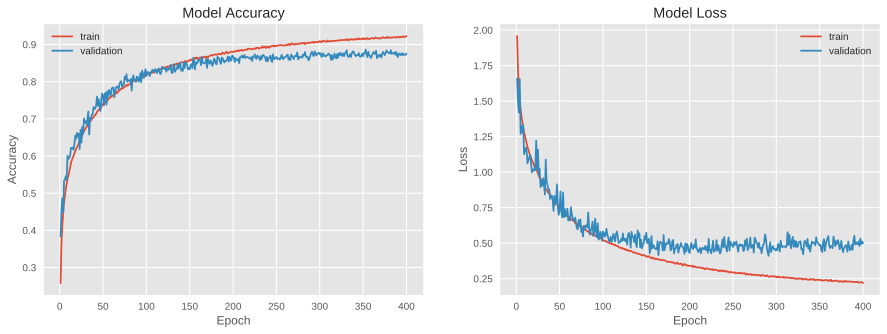

In [23]:
plot_model(augmented_model_details)

To further improve the model, run it for more epochs and do more augmentations like ZCA whitening. 

# Prediction

## Get Prediction labels from model

In [0]:
correct, predict_labels = predict_classes(augmented_model,test_images,test_labels)

In [26]:
print(correct)

[ True  True  True ...  True  True  True]


In [27]:
print(predict_labels)

[3 8 8 ... 5 1 7]


Calculate accuracy using manual calculation

## Show classifications result

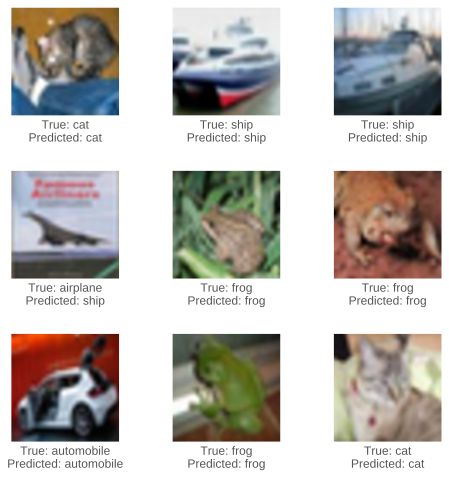

In [28]:
plot_images(images=test_images[0:9],
            true_labels=test_labels[0:9],
            class_names=class_names,
            labels_predict=predict_labels[0:9])

## Show wrong classifications

Plot the first 9 mis-classified images

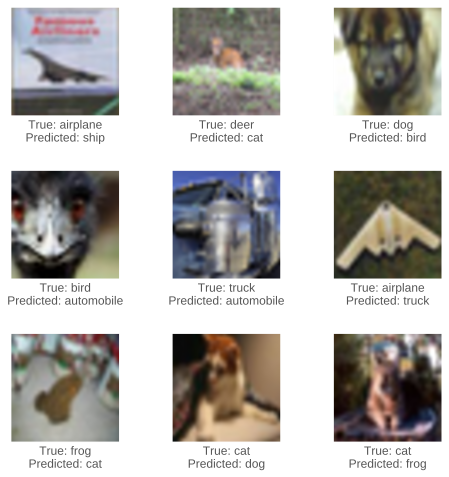

In [29]:
error_plot(test_images,test_labels,class_names,predict_labels,correct)

## Save result

In [30]:
save_result(predict_labels,class_names)

save result success.
